# Battle of the Neighborhoods - Coffee Shop in NYC

## Introduction
New York City is one of the most famous, romanticized and desired cities for living in the world due to its image portrayed in the pop culture. Some of the worlds' most popular content creators and influencers are located in the city for its stunning backgrounds and instagrammable dining and coffee locations. Combining that with the overall growing trend for coffee and small business coffee shops makes it an attractive investment to open a new coffee shop specifically in NYC where this coffee shop is likely to receive a lot of attention on social media to drive revenue.

Based on the business type and for the sake of this capstone project, our simplified assumptions for the best location would be a high-density population area with a relatively low number of existing coffee shops. Existing competition might in reality be a good factor as a specific neighborhood could be famous for its coffee shops and would attract more customers. In this project, we will examine the landscape of the city on existing competition to identify the best location for the investment.

## Data
Data required to approach the above business case should include New York City neighborhoods' and boroughs' geographical locations (latitude, longitude), laundromats' locations and boroughs' population density.

New York City data containing the neighborhoods and boroughs latitudes and longitudes can be obtained from https://cocl.us/new_york_dataset. While FourSquare API will be used to obtain data on existing coffee shops. Population density data per each borough will be extracted from http://www.demographia.com/dm-nyc.htm.

## Methodology
After collecting the data from https://cocl.us/new_york_dataset it will be wrangled into a dataframe format. Using the density data from http://www.demographia.com/dm-nyc.htm all above average density boroughs will be mapped onto the map. Then using Foursquare we will locate all venues in the following boroughs and then filter by "coffee shop" locations. Finally, the data be will be visually assessed from the resulted map.

## Business Problem
What is the best location(s) for coffee in New York City? In what Neighborhood and/or borough is preferred for investing into coffee shop business? What (if any) neighborhood is to go to for a cup of coffee?

### Solution Walkthrough
### 1. Collect neighborhoods location & population density data
First up, we will import the required libraries for this analysis, scrape the data from the data sources and plot the neighborhoods onto a map. 

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import os

!conda install -c conda-forge folium=0.5.0 --yes
import folium

import requests

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

print('Libraries imported')

Solving environment: done

# All requested packages already installed.

Libraries imported


In [2]:
#Scrape NYC data from the webpage
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
#Load the data
import json
from pandas.io.json import json_normalize
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
#Create a DataFrame for the dataset
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)

#Load data into the DataFrame
neighborhoods_data = newyork_data['features']
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [5]:
#Identify the shape of the dataframe
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
...,...,...,...,...
301,Manhattan,Hudson Yards,40.756658,-74.000111
302,Queens,Hammels,40.587338,-73.805530
303,Queens,Bayswater,40.611322,-73.765968
304,Queens,Queensbridge,40.756091,-73.945631


There are 306 records in the dataset.

#### Conduct analysis on population density and identify neighborhoods for further analysis

In [5]:
#Collect latest population density per sq mile information and create a dataframe
dens_list= [['Manhattan', 69873], ['Bronx', 31730],['Brooklyn', 35219], ['Queens', 20453], ['Staten Island', 7513]]
    
dens_df= pd.DataFrame(dens_list, columns =['Borough', 'Density'])
dens_df

,Borough,Density
0,Manhattan,69873
1,Bronx,31730
2,Brooklyn,35219
3,Queens,20453
4,Staten Island,7513


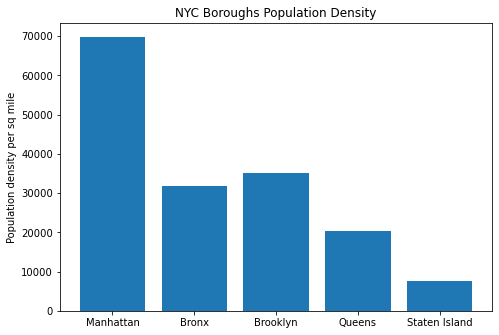

In [9]:
#Illustrate population density density of NYC by borough
fig1 = plt.figure()
ax = fig1.add_axes([0,0,1,1])
ax.bar(dens_df['Borough'],dens_df['Density'])
ax.set_ylabel('Population density per sq mile')
ax.set_title('NYC Boroughs Population Density')
plt.show()

In [8]:
#Identify the boroughs with below average population density
dens_df_low = dens_df[dens_df['Density']<dens_df['Density'].mean()]
dens_df_low

,Borough,Density
1,Bronx,31730
3,Queens,20453
4,Staten Island,7513


Boroughs Bronx, Queens and Staten Island will be excluded.

In [6]:
#Exclude below average boroughs from the nyc_df dataset
nyc_df1 = neighborhoods[neighborhoods['Borough'] != 'Bronx']
nyc_df2 = nyc_df1[nyc_df1['Borough'] != 'Queens']
nyc_df3 = nyc_df2[nyc_df2['Borough'] != 'Staten Island']
nyc_df3

,Borough,Neighborhood,Latitude,Longitude
6,Manhattan,Marble Hill,40.876551,-73.910660
46,Brooklyn,Bay Ridge,40.625801,-74.030621
47,Brooklyn,Bensonhurst,40.611009,-73.995180
48,Brooklyn,Sunset Park,40.645103,-74.010316
49,Brooklyn,Greenpoint,40.730201,-73.954241
...,...,...,...,...
289,Brooklyn,Homecrest,40.598525,-73.959185
295,Brooklyn,Highland Park,40.681999,-73.890346
296,Brooklyn,Madison,40.609378,-73.948415
300,Brooklyn,Erasmus,40.646926,-73.948177


The remaining dataset has 110 neighborhoods.

#### Illustrate the remaining neiborhoods on the map

In [7]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

Solving environment: done

# All requested packages already installed.



In [8]:
nyc_neighborhoods=nyc_df3

address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude


#Create map of New York City
nyc_map = folium.Map(location=[latitude, longitude], zoom_start=10)

#Add borough markers to the NYC map
for lat, lng, borough, neighborhood in zip(nyc_neighborhoods['Latitude'], nyc_neighborhoods['Longitude'], nyc_neighborhoods['Borough'], nyc_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(nyc_map)  
    
nyc_map

### 2. Collect location data of coffee shops

#### Connect to FourSquare API

In [9]:
#Define Foursquare credentials and version
CLIENT_ID = '1XWTWFEJC4Y40YTDOC2EOJHHSY4GAIYMTWH3ZRNEINTA1N3X' # your Foursquare ID
CLIENT_SECRET = 'EW3BHPQ1Q140BD5JBOWFIKWOR1IOTAAPRTJNGBDNUK50LHRB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [10]:
def geo_location(address):
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [11]:
def get_venues(lat,lng):
    radius=500
    LIMIT=100
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [12]:
def get_venue_details(venue_id):
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [49]:
#List of neighborhoods with Coffee Shops
column_names=['Borough', 'Neighborhood', 'ID','Name','Latitude','Longitude']
coffee_ny=pd.DataFrame(columns=column_names)
count=1
for row in nyc_neighborhoods.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    coffeeshop=venues[venues['Category']=='Coffee Shop']   
    print('(',count,'/',len(nyc_neighborhoods),')','Coffee Shops in '+Neighborhood+', '+Borough+':'+str(len(coffeeshop)))
    print(row)
    for coffeeshop_detail in coffeeshop.values.tolist():
        id, name , category=coffeeshop_detail
        coffee_ny = coffee_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

SyntaxError: invalid syntax (<ipython-input-49-3e1e32bcdc4a>, line 17)

#### Identify the neighborhood with highest number of coffee shops

In [15]:
coffee_ny

,Borough,Neighborhood,ID,Name
0,Manhattan,Marble Hill,55f81cd2498ee903149fcc64,Starbucks
1,Brooklyn,Bensonhurst,4d583d5cc406a35d041ff24a,Caffe Romeo
2,Brooklyn,Greenpoint,518cf9ec498e8c38bda0268d,Homecoming
3,Brooklyn,Greenpoint,576eb1f5cd10a371033f7ad6,Maman
4,Brooklyn,Greenpoint,58b6e16ffc73d40233da9715,odd fox
...,...,...,...,...
189,Brooklyn,Vinegar Hill,56462ba0498efa95117dbf41,Café Usagi
190,Brooklyn,Vinegar Hill,4eefb1d529c22c6c75dbcbf7,Yalla at Punto Bianco
191,Brooklyn,Dumbo,56462ba0498efa95117dbf41,Café Usagi
192,Manhattan,Hudson Yards,5c683caaf96b2c00397a8609,Oslo Coffee Roasters


There are total of 194 coffee shops in Brooklyn and Manhattan. Let's identify which borough out of two has the most coffee shops.

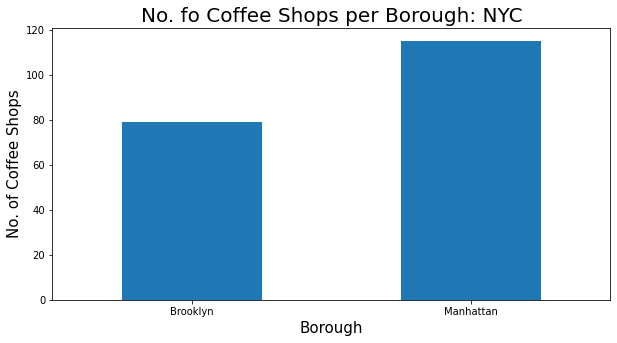

In [18]:
coffee_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5))
plt.title('No. fo Coffee Shops per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of Coffee Shops', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

Manhattan has more coffee shops than Brooklyn. However, this could be due to Manhattan having a greater number of neighborhoods than Brooklyn as we could see from the map. let's now identify the neighborhood with the most coffee shops among these two boroughs.

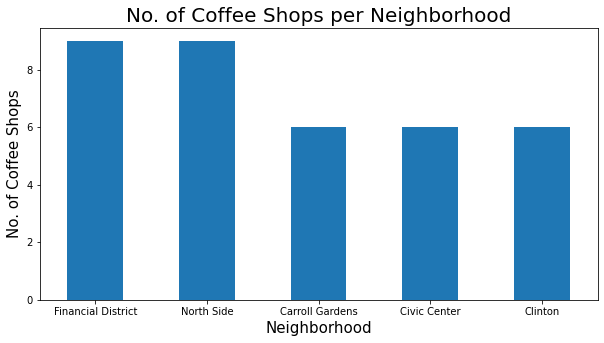

In [21]:
top_num_neighborhoods = 5 #We'd like to display top 5 neighborhoods
coffee_ny.groupby('Neighborhood')['ID'].count().nlargest(top_num_neighborhoods).plot.bar(figsize=(10,5))
plt.title('No. of Coffee Shops per Neighborhood', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No. of Coffee Shops', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

As illustrated by the above bar chart, there is a tie between Financial District, Manhattan and North Side, Brooklyn neighborhoods with 9 coffee shops each. The next 3 neighborhoods share a second place each with 6 coffee shops.

As 9 coffee shops is a very large number, the competition in those areas would be fierce for a new coffee shop. Could we aim for the next 3 neighborhoods in the top 5? Let's examine the rating of the coffee shops to assess the compatition further.

#### Identify the ratings of the coffee shops

In [28]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
cs_rating_ny=pd.DataFrame(columns=column_names)
count=1
for row in coffee_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data for id=',ID)
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(coffee_ny),')','processed')
    cs_rating_ny = cs_rating_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

{'meta': {'code': 200, 'requestId': '60c40e9708dd5409dbdb65e3'}, 'response': {'venue': {'id': '55f81cd2498ee903149fcc64', 'name': 'Starbucks', 'contact': {'phone': '6464559846', 'formattedPhone': '(646) 455-9846', 'twitter': 'starbucks', 'instagram': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '171 W 230th St', 'crossStreet': 'Kimberly Pl', 'lat': 40.87753134921497, 'lng': -73.90558216359267, 'labeledLatLngs': [{'label': 'display', 'lat': 40.87753134921497, 'lng': -73.90558216359267}], 'postalCode': '10463', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['171 W 230th St (Kimberly Pl)', 'Bronx, NY 10463', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/55f81cd2498ee903149fcc64', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss

{'meta': {'code': 200, 'requestId': '60c40e98abda580c63242993'}, 'response': {'venue': {'id': '518cf9ec498e8c38bda0268d', 'name': 'Homecoming', 'contact': {'phone': '3474575385', 'formattedPhone': '(347) 457-5385', 'twitter': 'homecomingbk', 'facebook': '238824996195128', 'facebookUsername': 'homecomingbk', 'facebookName': 'Homecoming'}, 'location': {'address': '107 Franklin St', 'crossStreet': 'btwn Noble St & Greenpoint Ave', 'lat': 40.72969603048622, 'lng': -73.95752484054493, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72969603048622, 'lng': -73.95752484054493}], 'postalCode': '11222', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['107 Franklin St (btwn Noble St & Greenpoint Ave)', 'Brooklyn, NY 11222', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/homecoming/518cf9ec498e8c38bda0268d', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop

{'meta': {'code': 200, 'requestId': '60c40e98fdc1b750657f4b05'}, 'response': {'venue': {'id': '576eb1f5cd10a371033f7ad6', 'name': 'Maman', 'contact': {}, 'location': {'address': '80 Kent St', 'crossStreet': 'at Franklin St', 'lat': 40.730446, 'lng': -73.958133, 'labeledLatLngs': [{'label': 'display', 'lat': 40.730446, 'lng': -73.958133}], 'postalCode': '11249', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['80 Kent St (at Franklin St)', 'New York, NY 11249', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/maman/576eb1f5cd10a371033f7ad6', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categor

{'meta': {'code': 200, 'requestId': '60c40e99e5d352398ff9a1c9'}, 'response': {'venue': {'id': '58b6e16ffc73d40233da9715', 'name': 'odd fox', 'contact': {}, 'location': {'address': '984 Manhattan Ave', 'crossStreet': 'India & Huron', 'lat': 40.73267268846633, 'lng': -73.95454999352046, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73267268846633, 'lng': -73.95454999352046}], 'postalCode': '11222', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['984 Manhattan Ave (India & Huron)', 'Brooklyn, NY 11222', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/odd-fox/58b6e16ffc73d40233da9715', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 8}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': 

{'meta': {'code': 200, 'requestId': '60c40e9af6a1442834a4725f'}, 'response': {'venue': {'id': '575467b1498e848fce847ca1', 'name': 'Pueblo Querido Coffee Roasters', 'contact': {'phone': '9293462986', 'formattedPhone': '(929) 346-2986', 'twitter': 'pqcoffee', 'instagram': 'pqcoffee'}, 'location': {'address': '195 Greenpoint Ave', 'crossStreet': 'McGuinness Blvd.', 'lat': 40.730526, 'lng': -73.951822, 'labeledLatLngs': [{'label': 'display', 'lat': 40.730526, 'lng': -73.951822}, {'label': 'entrance', 'lat': 40.73051, 'lng': -73.951834}], 'postalCode': '11222', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['195 Greenpoint Ave (McGuinness Blvd.)', 'Brooklyn, NY 11222', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pueblo-querido-coffee-roasters/575467b1498e848fce847ca1', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://

{'meta': {'code': 200, 'requestId': '60c40e9a83366e161f7915bb'}, 'response': {'venue': {'id': '55cf6244498e24c4ebe3ae0b', 'name': 'Sweetleaf', 'contact': {}, 'location': {'address': '159 Freeman St', 'lat': 40.734431143292184, 'lng': -73.95542611092719, 'labeledLatLngs': [{'label': 'display', 'lat': 40.734431143292184, 'lng': -73.95542611092719}, {'label': 'entrance', 'lat': 40.734492, 'lng': -73.955381}], 'postalCode': '11222', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['159 Freeman St', 'Brooklyn, NY 11222', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sweetleaf/55cf6244498e24c4ebe3ae0b', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 24}, 'url': 'https://sweetleafcoffee.com', 'pr

{'meta': {'code': 200, 'requestId': '60c40e9a5928183be0cbf7d4'}, 'response': {'venue': {'id': '4b59aedcf964a520999228e3', 'name': 'Starbucks', 'contact': {'phone': '7189343211', 'formattedPhone': '(718) 934-3211', 'twitter': 'starbucks', 'instagram': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '607 Brighton Beach Ave', 'crossStreet': 'btwn Brighton 6th & Brighton 7th St', 'lat': 40.57784143, 'lng': -73.96120404, 'labeledLatLngs': [{'label': 'display', 'lat': 40.57784143, 'lng': -73.96120404}, {'label': 'entrance', 'lat': 40.577949, 'lng': -73.961244}], 'postalCode': '11235', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['607 Brighton Beach Ave (btwn Brighton 6th & Brighton 7th St)', 'Brooklyn, NY 11235', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4b59aedcf964a520999228e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name

{'meta': {'code': 200, 'requestId': '60c40e9b8d670a4d58e27838'}, 'response': {'venue': {'id': '5172b2d4498e646485496d05', 'name': 'Coffee Mob', 'contact': {'twitter': 'thecoffeemob'}, 'location': {'address': '1514 Newkirk Ave', 'crossStreet': 'at E 16th St', 'lat': 40.635841273905065, 'lng': -73.96256072887337, 'labeledLatLngs': [{'label': 'display', 'lat': 40.635841273905065, 'lng': -73.96256072887337}, {'label': 'entrance', 'lat': 40.635667, 'lng': -73.96279}], 'postalCode': '11226', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1514 Newkirk Ave (at E 16th St)', 'Brooklyn, NY 11226', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/coffee-mob/5172b2d4498e646485496d05', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf

{'meta': {'code': 200, 'requestId': '60c40e9b412fbb3a574a98d9'}, 'response': {'venue': {'id': '55845926498e6ad57d30d6f8', 'name': 'Coffee Z', 'contact': {}, 'location': {'address': '30 Newkirk Plz', 'lat': 40.634682472077664, 'lng': -73.96278208484142, 'labeledLatLngs': [{'label': 'display', 'lat': 40.634682472077664, 'lng': -73.96278208484142}, {'label': 'entrance', 'lat': 40.634672, 'lng': -73.962864}], 'postalCode': '11226', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['30 Newkirk Plz', 'Brooklyn, NY 11226', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/coffee-z/55845926498e6ad57d30d6f8', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 2}, 'url': 'http://coffeezplaza.com', 'price': 

{'meta': {'code': 200, 'requestId': '60c40e9c3efa1124bea566d9'}, 'response': {'venue': {'id': '4a2407e6f964a520ef7d1fe3', 'name': 'Sit & Wonder', 'contact': {'phone': '7186220299', 'formattedPhone': '(718) 622-0299', 'twitter': 'sitandwonder', 'facebook': '219220151432590', 'facebookUsername': 'SitandWonder.org', 'facebookName': 'Sit & Wonder'}, 'location': {'address': '688 Washington Ave', 'crossStreet': 'btwn Prospect Pl & St Marks Ave', 'lat': 40.67735699650139, 'lng': -73.96386086940765, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67735699650139, 'lng': -73.96386086940765}, {'label': 'entrance', 'lat': 40.677371, 'lng': -73.963824}], 'postalCode': '11238', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['688 Washington Ave (btwn Prospect Pl & St Marks Ave)', 'Brooklyn, NY 11238', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sit--wonder/4a2407e6f964a520ef7d1fe3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', '

{'meta': {'code': 200, 'requestId': '60c40e9dd6791d592e7396d2'}, 'response': {'venue': {'id': '5a6cc216f5e9d763b7a37c8f', 'name': 'Gran Caffe De Martini', 'contact': {}, 'location': {'address': '609 Vanderbilt Ave', 'lat': 40.67910336932808, 'lng': -73.96832032665563, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67910336932808, 'lng': -73.96832032665563}], 'postalCode': '11238', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['609 Vanderbilt Ave', 'Brooklyn, NY 11238', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/gran-caffe-de-martini/5a6cc216f5e9d763b7a37c8f', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 7}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'c

{'meta': {'code': 200, 'requestId': '60c40e9d21b8055b80034696'}, 'response': {'venue': {'id': '55b02e05498ef881a3a44c6d', 'name': "The Flat's BK Speed Coffee", 'contact': {'phone': '3478787474', 'formattedPhone': '(347) 878-7474', 'twitter': 'bkspeedcoffee'}, 'location': {'address': '308 Hooper St', 'crossStreet': 'Broadway', 'lat': 40.70730384358056, 'lng': -73.95386713180666, 'labeledLatLngs': [{'label': 'display', 'lat': 40.70730384358056, 'lng': -73.95386713180666}], 'postalCode': '11211', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['308 Hooper St (Broadway)', 'Brooklyn, NY 11211', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/the-flats-bk-speed-coffee/55b02e05498ef881a3a44c6d', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': Tr

{'meta': {'code': 200, 'requestId': '60c40e9dabacf210900fe943'}, 'response': {'venue': {'id': '5d8663bddfbfcc0007278c66', 'name': 'Konditori', 'contact': {}, 'location': {'address': '297 Broadway', 'crossStreet': 'Entrance on Marcy Av', 'lat': 40.708614, 'lng': -73.957906, 'labeledLatLngs': [{'label': 'display', 'lat': 40.708614, 'lng': -73.957906}], 'postalCode': '11211', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['297 Broadway (Entrance on Marcy Av)', 'Brooklyn, NY 11211', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/konditori/5d8663bddfbfcc0007278c66', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16a941735', 'name': 'Bakery', 'pluralName': 'Bakeries', 'shortName': 'Bakery', 'icon': {'prefix': 'h

{'meta': {'code': 200, 'requestId': '60c40e9efdc1b750657f57bf'}, 'response': {'venue': {'id': '5ca8ea3cd4cc980039e3729c', 'name': 'Lazy Suzy Cafe & Shop', 'contact': {'phone': '9172757222', 'formattedPhone': '(917) 275-7222'}, 'location': {'address': '703  Hart Street', 'crossStreet': 'Wilson Ave.', 'lat': 40.6994743347168, 'lng': -73.92550659179688, 'labeledLatLngs': [{'label': 'display', 'lat': 40.6994743347168, 'lng': -73.92550659179688}], 'postalCode': '11221', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['703  Hart Street (Wilson Ave.)', 'New York, NY 11221', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lazy-suzy-cafe--shop/5ca8ea3cd4cc980039e3729c', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'st

{'meta': {'code': 200, 'requestId': '60c40e9fbfbfc40d2e6f7457'}, 'response': {'venue': {'id': '56b8c8aa498e095e6ff4b065', 'name': 'Brooklyn Kava', 'contact': {}, 'location': {'address': '191 Suydam St.', 'crossStreet': 'Wilson Ave.', 'lat': 40.70039841380254, 'lng': -73.92551762093899, 'labeledLatLngs': [{'label': 'display', 'lat': 40.70039841380254, 'lng': -73.92551762093899}], 'postalCode': '11221', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['191 Suydam St. (Wilson Ave.)', 'Brooklyn, NY 11221', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/brooklyn-kava/56b8c8aa498e095e6ff4b065', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 10}, 'url': 'http://brooklynkava.com', 'price': {'tier'

{'meta': {'code': 200, 'requestId': '60c40e9ff3ef6a0ce4932eed'}, 'response': {'venue': {'id': '54c595e2498e9ffb3d369250', 'name': 'Bushwick Public House', 'contact': {'phone': '9179668500', 'formattedPhone': '(917) 966-8500', 'twitter': 'bushwickph', 'facebook': '890223040995888', 'facebookName': 'Bushwick Public House'}, 'location': {'address': '1288 Myrtle Ave', 'crossStreet': 'Central Avenue', 'lat': 40.69810452616295, 'lng': -73.92487120915003, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69810452616295, 'lng': -73.92487120915003}, {'label': 'entrance', 'lat': 40.698038, 'lng': -73.924783}], 'postalCode': '11221', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1288 Myrtle Ave (Central Avenue)', 'Brooklyn, NY 11221', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bushwick-public-house/54c595e2498e9ffb3d369250', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 's

{'meta': {'code': 200, 'requestId': '60c40ea0abda580c63243987'}, 'response': {'venue': {'id': '56bf7516cd1024b6713b3563', 'name': 'Brooklyn Kettle', 'contact': {'twitter': 'brooklynkettle', 'facebook': '126965687667545', 'facebookName': 'Brooklyn Kettle'}, 'location': {'address': '420 Putnam Ave', 'lat': 40.68463612139113, 'lng': -73.9446114639709, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68463612139113, 'lng': -73.9446114639709}, {'label': 'entrance', 'lat': 40.684564, 'lng': -73.944573}], 'postalCode': '11216', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['420 Putnam Ave', 'Brooklyn, NY 11216', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/brooklyn-kettle/56bf7516cd1024b6713b3563', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'pri

{'meta': {'code': 200, 'requestId': '60c40ea0948d0065fbac2ae5'}, 'response': {'venue': {'id': '52a102da11d29a428cb564e7', 'name': 'Crocus Coffee', 'contact': {}, 'location': {'address': '328 Tompkins Ave', 'lat': 40.68655339859347, 'lng': -73.94457685574372, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68655339859347, 'lng': -73.94457685574372}, {'label': 'entrance', 'lat': 40.686478, 'lng': -73.944663}], 'postalCode': '11216', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['328 Tompkins Ave', 'Brooklyn, NY 11216', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/crocus-coffee/52a102da11d29a428cb564e7', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 6}, 'price': {'tier': 1, 'message':

{'meta': {'code': 200, 'requestId': '60c40ea1bfbfc40d2e6f7816'}, 'response': {'venue': {'id': '4de26e06814df7ebdc14af8b', 'name': 'Vineapple Cafe', 'contact': {'phone': '3477991035', 'formattedPhone': '(347) 799-1035', 'twitter': 'vineapple71', 'instagram': 'vineapple71', 'facebook': '151802771550513', 'facebookUsername': 'Vineapple', 'facebookName': 'Vineapple'}, 'location': {'address': '71 Pineapple St', 'crossStreet': 'btwn Henry & Hicks St', 'lat': 40.69829747774025, 'lng': -73.99306207895279, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69829747774025, 'lng': -73.99306207895279}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['71 Pineapple St (btwn Henry & Hicks St)', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/vineapple-cafe/4de26e06814df7ebdc14af8b', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName':

{'meta': {'code': 200, 'requestId': '60c40ea14263315fc1f4c3bf'}, 'response': {'venue': {'id': '59d7872e5a2c911745c2e8ca', 'name': 'Joe Coffee', 'contact': {'phone': '3474220304', 'formattedPhone': '(347) 422-0304', 'twitter': 'joecoffeenyc', 'facebook': '218350858817750', 'facebookUsername': 'JoeCoffeeBrooklynHeights', 'facebookName': 'Joe Coffee Company'}, 'location': {'address': '102 Hicks St', 'lat': 40.6986734, 'lng': -73.9943579, 'labeledLatLngs': [{'label': 'display', 'lat': 40.6986734, 'lng': -73.9943579}], 'postalCode': '11201', 'cc': 'US', 'neighborhood': 'Brooklyn Heights', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['102 Hicks St', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/joe-coffee/59d7872e5a2c911745c2e8ca', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v

{'meta': {'code': 200, 'requestId': '60c40ea285c9e76e27d42a27'}, 'response': {'venue': {'id': '59c2c26635f9837e08397ef4', 'name': 'Fare & Folk', 'contact': {}, 'location': {'address': '402 Henry St', 'crossStreet': 'Baltic Street', 'lat': 40.68750463571392, 'lng': -73.99781630830245, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68750463571392, 'lng': -73.99781630830245}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['402 Henry St (Baltic Street)', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/fare--folk/59c2c26635f9837e08397ef4', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'

{'meta': {'code': 200, 'requestId': '60c40ea2948d0065fbac2eea'}, 'response': {'venue': {'id': '5b930cafb77c77002c38373b', 'name': 'Salter House', 'contact': {}, 'location': {'address': '119 Atlantic Ave', 'crossStreet': 'Henry St.', 'lat': 40.69087819947039, 'lng': -73.99630721466154, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69087819947039, 'lng': -73.99630721466154}], 'postalCode': '11201', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['119 Atlantic Ave (Henry St.)', 'New York, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/salter-house/5b930cafb77c77002c38373b', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d128951735', 'name': 'Gift Shop', 'pluralName': 'Gift Shops', 'shortName': 'G

{'meta': {'code': 200, 'requestId': '60c40ea321b8055b80035495'}, 'response': {'venue': {'id': '5d7ce692b4fc9c0008394021', 'name': 'Hungry Ghost', 'contact': {}, 'location': {'address': '343 Smith St', 'lat': 40.680281, 'lng': -73.994678, 'labeledLatLngs': [{'label': 'display', 'lat': 40.680281, 'lng': -73.994678}], 'postalCode': '11231', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['343 Smith St', 'New York, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/hungry-ghost/5d7ce692b4fc9c0008394021', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.

{'meta': {'code': 200, 'requestId': '60c40ea4705605297649e678'}, 'response': {'venue': {'id': '5afda093012358002cfdbd9b', 'name': 'Planted', 'contact': {'phone': '9177045207', 'formattedPhone': '(917) 704-5207'}, 'location': {'address': '333 Smith St', 'lat': 40.680558, 'lng': -73.994584, 'labeledLatLngs': [{'label': 'display', 'lat': 40.680558, 'lng': -73.994584}], 'postalCode': '11231', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['333 Smith St', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/planted/5afda093012358002cfdbd9b', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.

{'meta': {'code': 200, 'requestId': '60c40ea5f939580394bab31a'}, 'response': {'venue': {'id': '5ccdd5fd8b98fd0039cf6e99', 'name': 'Bond Street Coffee And Goods', 'contact': {'phone': '7188527323', 'formattedPhone': '(718) 852-7323'}, 'location': {'address': '365 Bond street', 'lat': 40.67789, 'lng': -73.990785, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67789, 'lng': -73.990785}], 'postalCode': '11231', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['365 Bond street', 'New York, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bond-street-coffee-and-goods/5ccdd5fd8b98fd0039cf6e99', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, 'url': 'https://www.bondstcafe.com', 'pr

{'meta': {'code': 200, 'requestId': '60c40ea5b25b011c5d291482'}, 'response': {'venue': {'id': '5ab6635edb1d812e09c3bc11', 'name': 'Bklyn Habit', 'contact': {}, 'location': {'address': '405 Smith St', 'crossStreet': 'at 4th St', 'lat': 40.67808968531469, 'lng': -73.99609214717839, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67808968531469, 'lng': -73.99609214717839}], 'postalCode': '11231', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['405 Smith St (at 4th St)', 'New York, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bklyn-habit/5ab6635edb1d812e09c3bc11', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 15}, 'url': 'https://www.brooklynhabit.com', 'price': {'tier': 1, '

{'meta': {'code': 200, 'requestId': '60c40ea54ad79a70cc9cf352'}, 'response': {'venue': {'id': '49e49a74f964a52010631fe3', 'name': "D'Amico Coffee Roasters", 'contact': {'phone': '7188755403', 'formattedPhone': '(718) 875-5403'}, 'location': {'address': '309 Court St', 'crossStreet': 'Degraw St', 'lat': 40.683593021952916, 'lng': -73.99530657474676, 'labeledLatLngs': [{'label': 'display', 'lat': 40.683593021952916, 'lng': -73.99530657474676}, {'label': 'entrance', 'lat': 40.683503, 'lng': -73.995206}], 'postalCode': '11231', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['309 Court St (Degraw St)', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/damico-coffee-roasters/49e49a74f964a52010631fe3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suf

{'meta': {'code': 200, 'requestId': '60c40ea61a19a355b0e5e9ff'}, 'response': {'venue': {'id': '5b2aa0d02619ee002c85184e', 'name': 'nerd be cool.', 'contact': {}, 'location': {'address': '518 Court St', 'crossStreet': 'btwn Huntington & Nelson St', 'lat': 40.67615624798502, 'lng': -73.99889198473417, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67615624798502, 'lng': -73.99889198473417}], 'postalCode': '11231', 'cc': 'US', 'neighborhood': 'Carroll Gardens', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['518 Court St (btwn Huntington & Nelson St)', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/nerd-be-cool/5b2aa0d02619ee002c85184e', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16d941735', 

{'meta': {'code': 200, 'requestId': '60c40ea6de66f55037633bcd'}, 'response': {'venue': {'id': '5ab6635edb1d812e09c3bc11', 'name': 'Bklyn Habit', 'contact': {}, 'location': {'address': '405 Smith St', 'crossStreet': 'at 4th St', 'lat': 40.67808968531469, 'lng': -73.99609214717839, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67808968531469, 'lng': -73.99609214717839}], 'postalCode': '11231', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['405 Smith St (at 4th St)', 'New York, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bklyn-habit/5ab6635edb1d812e09c3bc11', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 15}, 'url': 'https://www.brooklynhabit.com', 'price': {'tier': 1, '

{'meta': {'code': 200, 'requestId': '60c40ea71a19a355b0e5ec43'}, 'response': {'venue': {'id': '49b79e04f964a5202b531fe3', 'name': 'Bittersweet', 'contact': {'phone': '7188522556', 'formattedPhone': '(718) 852-2556', 'twitter': 'bittersweetfg', 'facebook': '240774406018081', 'facebookUsername': 'Bittersweetcoffeeshop', 'facebookName': 'Bittersweet'}, 'location': {'address': '180 DeKalb Ave', 'crossStreet': 'btwn Washington Pk & Carlton Ave', 'lat': 40.689587651946525, 'lng': -73.97249488542947, 'labeledLatLngs': [{'label': 'display', 'lat': 40.689587651946525, 'lng': -73.97249488542947}, {'label': 'entrance', 'lat': 40.689498, 'lng': -73.972548}], 'postalCode': '11205', 'cc': 'US', 'neighborhood': 'Fort Greene', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['180 DeKalb Ave (btwn Washington Pk & Carlton Ave)', 'Brooklyn, NY 11205', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bittersweet/49b79e04f964a5202b531fe3', 'categories': [{'id'

{'meta': {'code': 200, 'requestId': '60c40ea76c717c5afc7b4f32'}, 'response': {'venue': {'id': '5295f62511d24c029a9ec2d9', 'name': 'Hungry Ghost', 'contact': {'phone': '7187973595', 'formattedPhone': '(718) 797-3595'}, 'location': {'address': '781 Fulton St', 'crossStreet': 'at S. Oxford St', 'lat': 40.686019848047394, 'lng': -73.97355641043038, 'labeledLatLngs': [{'label': 'display', 'lat': 40.686019848047394, 'lng': -73.97355641043038}], 'postalCode': '11217', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['781 Fulton St (at S. Oxford St)', 'Brooklyn, NY 11217', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/hungry-ghost/5295f62511d24c029a9ec2d9', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipC

{'meta': {'code': 200, 'requestId': '60c40ea83efa1124bea5800e'}, 'response': {'venue': {'id': '5e2c4d6803cb1200089cbb9e', 'name': 'Hungry Ghost', 'contact': {}, 'location': {'address': '156 7th Ave', 'crossStreet': 'Garfield', 'lat': 40.672276, 'lng': -73.977265, 'labeledLatLngs': [{'label': 'display', 'lat': 40.672276, 'lng': -73.977265}], 'postalCode': '10011', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['156 7th Ave (Garfield)', 'New York, NY 10011', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/hungry-ghost/5e2c4d6803cb1200089cbb9e', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 2}, 'url': 'https://www.hungryghostcoffee.com', 'price': {'tier': 1, 'message': 'Cheap', 'currency': 

{'meta': {'code': 200, 'requestId': '60c40ea89e2d44612ce3bd8c'}, 'response': {'venue': {'id': '582332f950111c2bcea530e9', 'name': 'Blue Bottle Coffee', 'contact': {}, 'location': {'address': '203 7th Ave', 'crossStreet': 'at 3rd St', 'lat': 40.67060012485774, 'lng': -73.97845821487122, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67060012485774, 'lng': -73.97845821487122}, {'label': 'entrance', 'lat': 40.670649, 'lng': -73.978287}], 'postalCode': '11215', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['203 7th Ave (at 3rd St)', 'Brooklyn, NY 11215', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/blue-bottle-coffee/582332f950111c2bcea530e9', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCou

{'meta': {'code': 200, 'requestId': '60c40ea9ca820f5b840ecf08'}, 'response': {'venue': {'id': '4a64e954f964a520f6c61fe3', 'name': 'Café Regular du Nord', 'contact': {'phone': '7187830673', 'formattedPhone': '(718) 783-0673', 'twitter': 'caferegular', 'facebook': '408074899309454', 'facebookUsername': 'CafeRegular', 'facebookName': 'Cafe Regular'}, 'location': {'address': '158 Berkeley Pl', 'crossStreet': 'btwn 6th & 7th Ave', 'lat': 40.67515658418125, 'lng': -73.97530161274537, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67515658418125, 'lng': -73.97530161274537}, {'label': 'entrance', 'lat': 40.675178, 'lng': -73.975489}], 'postalCode': '11217', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['158 Berkeley Pl (btwn 6th & 7th Ave)', 'Brooklyn, NY 11217', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/caf%C3%A9-regular-du-nord/4a64e954f964a520f6c61fe3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee S

{'meta': {'code': 200, 'requestId': '60c40ea9d07e8452d1f0c85a'}, 'response': {'venue': {'id': '5b65a1ee6dcf04002cbca38f', 'name': 'Velvette Brew', 'contact': {'instagram': 'velvettebrew', 'facebook': '222623231594571', 'facebookUsername': 'velvettebrew', 'facebookName': 'Velvette Brew'}, 'location': {'address': '279 5th Ave', 'crossStreet': '1st St.', 'lat': 40.67393232429361, 'lng': -73.98228660482863, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67393232429361, 'lng': -73.98228660482863}], 'postalCode': '11215', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['279 5th Ave (1st St.)', 'Brooklyn, NY 11215', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/velvette-brew/5b65a1ee6dcf04002cbca38f', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'p

{'meta': {'code': 200, 'requestId': '60c40eaa38e6cc6366cfcbce'}, 'response': {'venue': {'id': '5d8e3010396792000846b37c', 'name': 'nerd be cool. Espresso lab', 'contact': {}, 'location': {'address': '176 Lincoln Place', 'crossStreet': '7th Avenue', 'lat': 40.675549, 'lng': -73.974445, 'labeledLatLngs': [{'label': 'display', 'lat': 40.675549, 'lng': -73.974445}], 'postalCode': '11217', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['176 Lincoln Place (7th Avenue)', 'New York, NY 11217', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/nerd-be-cool-espresso-lab/5d8e3010396792000846b37c', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4}, 'url': 'https://nerdbecool.com', 'price': {'tier': 1, 

{'meta': {'code': 200, 'requestId': '60c40eaa46a2120b921ae2d7'}, 'response': {'venue': {'id': '59f2499012f0a97a14b38d57', 'name': 'Milk Bar', 'contact': {'instagram': 'milkbarbrooklyn', 'facebook': '91215651704', 'facebookUsername': 'milkbarbrooklyn', 'facebookName': 'Milk Bar'}, 'location': {'address': '204 6th Ave', 'crossStreet': 'Union', 'lat': 40.67545579055746, 'lng': -73.97798842992185, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67545579055746, 'lng': -73.97798842992185}], 'postalCode': '11217', 'cc': 'US', 'neighborhood': 'North Slope', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['204 6th Ave (Union)', 'Brooklyn, NY 11217', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/milk-bar/59f2499012f0a97a14b38d57', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix

{'meta': {'code': 200, 'requestId': '60c40eab77b4933b833f2c88'}, 'response': {'venue': {'id': '546f2a1e498ec971bfa42c81', 'name': 'Starbucks', 'contact': {'phone': '7182651069', 'formattedPhone': '(718) 265-1069', 'twitter': 'starbucks', 'instagram': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '8973 Bay Parkway', 'crossStreet': "at Caesar's Bay Shopping Cr", 'lat': 40.59522682860779, 'lng': -74.00001700705624, 'labeledLatLngs': [{'label': 'display', 'lat': 40.59522682860779, 'lng': -74.00001700705624}], 'postalCode': '11214', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ["8973 Bay Parkway (at Caesar's Bay Shopping Cr)", 'Brooklyn, NY 11214', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/546f2a1e498ec971bfa42c81', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Co

{'meta': {'code': 200, 'requestId': '60c40eab9e2d44612ce3c34b'}, 'response': {'venue': {'id': '55ef5340498eb1fd97754344', 'name': '1982 Coffee Roasters', 'contact': {'phone': '7184751982', 'formattedPhone': '(718) 475-1982', 'twitter': '1982coffee'}, 'location': {'address': '5405 13th Ave', 'lat': 40.631909, 'lng': -73.994964, 'labeledLatLngs': [{'label': 'display', 'lat': 40.631909, 'lng': -73.994964}], 'postalCode': '11219', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['5405 13th Ave', 'Brooklyn, NY 11219', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/1982-coffee-roasters/55ef5340498eb1fd97754344', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, 'price': {'tier': 1, 'message': '

{'meta': {'code': 200, 'requestId': '60c40eac234a3337ad6fdb18'}, 'response': {'venue': {'id': '5a6395d32105c3555b679f6e', 'name': 'Hungry Ghost', 'contact': {'phone': '7184890998', 'formattedPhone': '(718) 489-0998'}, 'location': {'address': '80 Dekalb Ave', 'lat': 40.68985278051951, 'lng': -73.98024666542231, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68985278051951, 'lng': -73.98024666542231}], 'postalCode': '11201', 'cc': 'US', 'neighborhood': 'Fort Greene', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['80 Dekalb Ave', 'New York, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/hungry-ghost/5a6395d32105c3555b679f6e', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 7}, 'url': 'htt

{'meta': {'code': 200, 'requestId': '60c40eac948d0065fbac4483'}, 'response': {'venue': {'id': '5b89aecc8c812a002ca7f2af', 'name': 'Coffee Project New York', 'contact': {'phone': '5858883153', 'formattedPhone': '(585) 888-3153', 'twitter': 'coffeeprojectny', 'instagram': 'coffeeprojectny', 'facebook': '1488169071405559', 'facebookUsername': 'coffeeprojectny', 'facebookName': 'Coffee Project New York'}, 'location': {'address': '78 Rockwell Pl', 'crossStreet': 'Fulton St', 'lat': 40.687751, 'lng': -73.979387, 'labeledLatLngs': [{'label': 'display', 'lat': 40.687751, 'lng': -73.979387}], 'postalCode': '11217', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['78 Rockwell Pl (Fulton St)', 'Brooklyn, NY 11217', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/coffee-project-new-york/5b89aecc8c812a002ca7f2af', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Sh

{'meta': {'code': 200, 'requestId': '60c40eace5d352398ff9cb41'}, 'response': {'venue': {'id': '5c9f97a8535d6f002c4abf09', 'name': 'White Noise Coffee Co.', 'contact': {'instagram': 'whitenoisecoffeeco'}, 'location': {'address': '71 Smith St', 'crossStreet': 'at Schermerhorn St', 'lat': 40.68973648217195, 'lng': -73.98820269257013, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68973648217195, 'lng': -73.98820269257013}], 'postalCode': '11201', 'cc': 'US', 'neighborhood': 'Boerum Hill', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['71 Smith St (at Schermerhorn St)', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/white-noise-coffee-co/5c9f97a8535d6f002c4abf09', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verifi

{'meta': {'code': 200, 'requestId': '60c40ead78cb2957d04bc4e0'}, 'response': {'venue': {'id': '4decde37ae60e98923954296', 'name': 'Brooklyn Grind', 'contact': {'twitter': 'brooklyngrind'}, 'location': {'address': '1 University Plz', 'lat': 40.69115263305686, 'lng': -73.98099135330169, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69115263305686, 'lng': -73.98099135330169}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1 University Plz', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/brooklyn-grind/4decde37ae60e98923954296', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1a1941735', 'name': 'College Cafeteria', 'pluralName': 'College Cafeterias', 'shortNam

{'meta': {'code': 200, 'requestId': '60c40eae3cac2b236f4d89f9'}, 'response': {'venue': {'id': '5b89aecc8c812a002ca7f2af', 'name': 'Coffee Project New York', 'contact': {'phone': '5858883153', 'formattedPhone': '(585) 888-3153', 'twitter': 'coffeeprojectny', 'instagram': 'coffeeprojectny', 'facebook': '1488169071405559', 'facebookUsername': 'coffeeprojectny', 'facebookName': 'Coffee Project New York'}, 'location': {'address': '78 Rockwell Pl', 'crossStreet': 'Fulton St', 'lat': 40.687751, 'lng': -73.979387, 'labeledLatLngs': [{'label': 'display', 'lat': 40.687751, 'lng': -73.979387}], 'postalCode': '11217', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['78 Rockwell Pl (Fulton St)', 'Brooklyn, NY 11217', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/coffee-project-new-york/5b89aecc8c812a002ca7f2af', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Sh

{'meta': {'code': 200, 'requestId': '60c40eae77b4933b833f33cc'}, 'response': {'venue': {'id': '5d90bcd9bdcf690008c68e47', 'name': 'IXV', 'contact': {}, 'location': {'lat': 40.684794, 'lng': -73.981398, 'labeledLatLngs': [{'label': 'display', 'lat': 40.684794, 'lng': -73.981398}], 'postalCode': '11217', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['New York, NY 11217', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ixv/5d90bcd9bdcf690008c68e47', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 16, 'groups': [{'type': 'others', 'count': 16, 'items': []}], 'summary': '16 Likes'}, 'dislike': False, 'ok': False,

{'meta': {'code': 200, 'requestId': '60c40eafb25b011c5d292944'}, 'response': {'venue': {'id': '5ae700063fcee800395266b5', 'name': 'Hungry Ghost', 'contact': {}, 'location': {'lat': 40.687996968744294, 'lng': -73.97880486327516, 'labeledLatLngs': [{'label': 'display', 'lat': 40.687996968744294, 'lng': -73.97880486327516}], 'postalCode': '11217', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['New York, NY 11217', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/hungry-ghost/5ae700063fcee800395266b5', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'url': 'https://www.hungryghostcoffee.com', 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 19, 'groups': [{'typ

{'meta': {'code': 200, 'requestId': '60c40eafcc8f6873893ed965'}, 'response': {'venue': {'id': '5e4aaa1ea1c4c20008f3fbfb', 'name': 'Hamlet Coffee Company', 'contact': {'instagram': 'hamletcoffeecompany'}, 'location': {'address': '465 Rogers Ave', 'lat': 40.66084, 'lng': -73.95352, 'labeledLatLngs': [{'label': 'display', 'lat': 40.66084, 'lng': -73.95352}], 'postalCode': '11225', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['465 Rogers Ave', 'Brooklyn, NY 11225', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/hamlet-coffee-company/5e4aaa1ea1c4c20008f3fbfb', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 6, 

{'meta': {'code': 200, 'requestId': '60c40eb04263315fc1f4e221'}, 'response': {'venue': {'id': '5c0ae329898bdc002c5d08f9', 'name': 'Starbucks', 'contact': {}, 'location': {'lat': 40.625874, 'lng': -73.91746, 'labeledLatLngs': [{'label': 'display', 'lat': 40.625874, 'lng': -73.91746}], 'postalCode': '11234', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Brooklyn, NY 11234', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/5c0ae329898bdc002c5d08f9', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 2}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 3, 'groups': [{'type': 'others', 'count': 3, 'items': []}], 'summary': '3 Likes'}, 'dislike': False, 'ok':

{'meta': {'code': 200, 'requestId': '60c40eb099dd1044122259da'}, 'response': {'venue': {'id': '55aad5ad498e3edffdc18580', 'name': 'City of Saints Coffee Roasters', 'contact': {'phone': '9299005484', 'formattedPhone': '(929) 900-5484', 'twitter': 'cityofsaintscr', 'instagram': 'cityofsaintscoffee', 'facebook': '541919979270333', 'facebookName': 'City of Saints Coffee Roasters'}, 'location': {'address': '299 Meserole St', 'lat': 40.70886064129511, 'lng': -73.93602911739248, 'labeledLatLngs': [{'label': 'display', 'lat': 40.70886064129511, 'lng': -73.93602911739248}, {'label': 'entrance', 'lat': 40.708847, 'lng': -73.936042}], 'postalCode': '11206', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['299 Meserole St', 'Brooklyn, NY 11206', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/city-of-saints-coffee-roasters/55aad5ad498e3edffdc18580', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'C

{'meta': {'code': 200, 'requestId': '60c40eb1abacf21090101438'}, 'response': {'venue': {'id': '5d839388ebc5f800089cea77', 'name': 'Daymoves', 'contact': {'instagram': 'daymovesbk'}, 'location': {'address': '295 Grand St', 'crossStreet': 'Havemeyer St', 'lat': 40.71310397344715, 'lng': -73.9572586119175, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71310397344715, 'lng': -73.9572586119175}], 'postalCode': '10002', 'cc': 'US', 'neighborhood': 'Williamsburg, Brooklyn, NY', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['295 Grand St (Havemeyer St)', 'Brooklyn, NY 10002', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/daymoves/5d839388ebc5f800089cea77', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d116941735', 'name

{'meta': {'code': 200, 'requestId': '60c40eb1fdc1b750657f8167'}, 'response': {'venue': {'id': '5b86febb3731ee002c98aa4b', 'name': 'ppl', 'contact': {'instagram': 'pplnyc'}, 'location': {'address': '189 Roebling St', 'crossStreet': 'at S 1st St', 'lat': 40.71282137546778, 'lng': -73.95844548940659, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71282137546778, 'lng': -73.95844548940659}, {'label': 'entrance', 'lat': 40.712871, 'lng': -73.958455}], 'postalCode': '11211', 'cc': 'US', 'neighborhood': 'Williamsburg', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['189 Roebling St (at S 1st St)', 'Brooklyn, NY 11211', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ppl/5b86febb3731ee002c98aa4b', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], '

{'meta': {'code': 200, 'requestId': '60c40eb28d670a4d58e2a9e7'}, 'response': {'venue': {'id': '546e7431498ea09f2b9152be', 'name': 'Sweatshop', 'contact': {'phone': '9179607232', 'formattedPhone': '(917) 960-7232', 'twitter': 'sweatshop_nyc', 'facebook': '561532637270591', 'facebookUsername': 'sweatshopcollective', 'facebookName': 'Sweatshop'}, 'location': {'address': '232 Metropolitan Ave', 'lat': 40.7150109701807, 'lng': -73.95964443683624, 'labeledLatLngs': [{'label': 'entrance', 'lat': 40.714937, 'lng': -73.959704}, {'label': 'display', 'lat': 40.7150109701807, 'lng': -73.95964443683624}], 'postalCode': '11211', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['232 Metropolitan Ave', 'Brooklyn, NY 11211', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sweatshop/546e7431498ea09f2b9152be', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon'

{'meta': {'code': 200, 'requestId': '60c40eb2abacf210901016d2'}, 'response': {'venue': {'id': '5b3cdc52c9a517002c585380', 'name': 'Blue Bottle Coffee', 'contact': {'phone': '5106533394', 'formattedPhone': '(510) 653-3394'}, 'location': {'address': '76 N 4 St', 'crossStreet': 'at Berry St', 'lat': 40.716913, 'lng': -73.961039, 'labeledLatLngs': [{'label': 'display', 'lat': 40.716913, 'lng': -73.961039}], 'postalCode': '11249', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['76 N 4 St (at Berry St)', 'Brooklyn, NY 11249', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/blue-bottle-coffee/5b3cdc52c9a517002c585380', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 12}, 'url': 'https://bluebottl

{'meta': {'code': 200, 'requestId': '60c40eb24263315fc1f4e85c'}, 'response': {'venue': {'id': '4ed1077a4690a03b5e13c348', 'name': 'Black Brick', 'contact': {'phone': '7183840075', 'formattedPhone': '(718) 384-0075'}, 'location': {'address': '300 Bedford Ave', 'crossStreet': 'btwn Grand & S 1st St', 'lat': 40.714184577749386, 'lng': -73.96155735867296, 'labeledLatLngs': [{'label': 'display', 'lat': 40.714184577749386, 'lng': -73.96155735867296}, {'label': 'entrance', 'lat': 40.714178, 'lng': -73.961624}], 'postalCode': '11249', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['300 Bedford Ave (btwn Grand & S 1st St)', 'Brooklyn, NY 11249', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/black-brick/4ed1077a4690a03b5e13c348', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_

{'meta': {'code': 200, 'requestId': '60c40eb3fdc1b750657f8454'}, 'response': {'venue': {'id': '5dcece7b5dd031000867b62e', 'name': 'Hungry Ghost', 'contact': {'instagram': 'hungryghostcoffee'}, 'location': {'address': '231 Bedford Avenue', 'crossStreet': 'North 4th Street & Bedford Avenue', 'lat': 40.716089, 'lng': -73.959484, 'labeledLatLngs': [{'label': 'display', 'lat': 40.716089, 'lng': -73.959484}], 'postalCode': '11211', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['231 Bedford Avenue (North 4th Street & Bedford Avenue)', 'New York, NY 11211', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/hungry-ghost/5dcece7b5dd031000867b62e', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, '

{'meta': {'code': 200, 'requestId': '60c40eb3a5c0e86df6cdf4d9'}, 'response': {'venue': {'id': '4eba99d3be7b1e562036cb46', 'name': 'Partners Coffee', 'contact': {'phone': '3475860063', 'formattedPhone': '(347) 586-0063', 'twitter': 'partners_coffee', 'instagram': 'partnerscoffee', 'facebook': '166431326755354', 'facebookUsername': 'partnerscoffeeroasters', 'facebookName': 'Partners Coffee'}, 'location': {'address': '125 N 6th St', 'crossStreet': 'btwn Bedford Ave & Berry St', 'lat': 40.718012, 'lng': -73.959174, 'labeledLatLngs': [{'label': 'display', 'lat': 40.718012, 'lng': -73.959174}, {'label': 'entrance', 'lat': 40.717943, 'lng': -73.959215}], 'postalCode': '11249', 'cc': 'US', 'neighborhood': 'Williamsburg', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['125 N 6th St (btwn Bedford Ave & Berry St)', 'Brooklyn, NY 11249', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/partners-coffee/4eba99d3be7b1e562036cb46', 'categories': [{'id':

{'meta': {'code': 200, 'requestId': '60c40eb44263315fc1f4eb93'}, 'response': {'venue': {'id': '5f3034c87150dc431d622427', 'name': 'Blank Street Coffee', 'contact': {}, 'location': {'address': '225 Wythe Ave', 'lat': 40.71706932840186, 'lng': -73.96285883263606, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71706932840186, 'lng': -73.96285883263606}], 'postalCode': '11249', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['225 Wythe Ave', 'New York, NY 11249', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/blank-street-coffee/5f3034c87150dc431d622427', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 18, 'gr

{'meta': {'code': 200, 'requestId': '60c40eb5cc8f6873893ee59e'}, 'response': {'venue': {'id': '5b86febb3731ee002c98aa4b', 'name': 'ppl', 'contact': {'instagram': 'pplnyc'}, 'location': {'address': '189 Roebling St', 'crossStreet': 'at S 1st St', 'lat': 40.71282137546778, 'lng': -73.95844548940659, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71282137546778, 'lng': -73.95844548940659}, {'label': 'entrance', 'lat': 40.712871, 'lng': -73.958455}], 'postalCode': '11211', 'cc': 'US', 'neighborhood': 'Williamsburg', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['189 Roebling St (at S 1st St)', 'Brooklyn, NY 11211', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ppl/5b86febb3731ee002c98aa4b', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], '

{'meta': {'code': 200, 'requestId': '60c40eb5551d2a4fb9caf1b1'}, 'response': {'venue': {'id': '5d839388ebc5f800089cea77', 'name': 'Daymoves', 'contact': {'instagram': 'daymovesbk'}, 'location': {'address': '295 Grand St', 'crossStreet': 'Havemeyer St', 'lat': 40.71310397344715, 'lng': -73.9572586119175, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71310397344715, 'lng': -73.9572586119175}], 'postalCode': '10002', 'cc': 'US', 'neighborhood': 'Williamsburg, Brooklyn, NY', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['295 Grand St (Havemeyer St)', 'Brooklyn, NY 10002', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/daymoves/5d839388ebc5f800089cea77', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d116941735', 'name

{'meta': {'code': 200, 'requestId': '60c40eb5948d0065fbac58b7'}, 'response': {'venue': {'id': '546e7431498ea09f2b9152be', 'name': 'Sweatshop', 'contact': {'phone': '9179607232', 'formattedPhone': '(917) 960-7232', 'twitter': 'sweatshop_nyc', 'facebook': '561532637270591', 'facebookUsername': 'sweatshopcollective', 'facebookName': 'Sweatshop'}, 'location': {'address': '232 Metropolitan Ave', 'lat': 40.7150109701807, 'lng': -73.95964443683624, 'labeledLatLngs': [{'label': 'entrance', 'lat': 40.714937, 'lng': -73.959704}, {'label': 'display', 'lat': 40.7150109701807, 'lng': -73.95964443683624}], 'postalCode': '11211', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['232 Metropolitan Ave', 'Brooklyn, NY 11211', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sweatshop/546e7431498ea09f2b9152be', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon'

{'meta': {'code': 200, 'requestId': '60c40eb6fdc1b750657f8a38'}, 'response': {'venue': {'id': '5d8663bddfbfcc0007278c66', 'name': 'Konditori', 'contact': {}, 'location': {'address': '297 Broadway', 'crossStreet': 'Entrance on Marcy Av', 'lat': 40.708614, 'lng': -73.957906, 'labeledLatLngs': [{'label': 'display', 'lat': 40.708614, 'lng': -73.957906}], 'postalCode': '11211', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['297 Broadway (Entrance on Marcy Av)', 'Brooklyn, NY 11211', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/konditori/5d8663bddfbfcc0007278c66', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16a941735', 'name': 'Bakery', 'pluralName': 'Bakeries', 'shortName': 'Bakery', 'icon': {'prefix': 'h

{'meta': {'code': 200, 'requestId': '60c40eb7d10abc587caf6787'}, 'response': {'venue': {'id': '579f74eb498e9a4d6caabeda', 'name': 'Little Canal', 'contact': {'phone': '9174727479', 'formattedPhone': '(917) 472-7479', 'instagram': 'littlecanal'}, 'location': {'address': '26 Canal St', 'crossStreet': 'at Essex St', 'lat': 40.714317, 'lng': -73.990361, 'labeledLatLngs': [{'label': 'display', 'lat': 40.714317, 'lng': -73.990361}], 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['26 Canal St (at Essex St)', 'New York, NY 10002', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/little-canal/579f74eb498e9a4d6caabeda', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16d941735', 'name': 'Café', '

{'meta': {'code': 200, 'requestId': '60c40eb7de66f55037635f10'}, 'response': {'venue': {'id': '5878d46d52a05106f220729c', 'name': 'Oliver Coffee', 'contact': {'instagram': 'oliver.coffee.counter'}, 'location': {'address': '9 Oliver St', 'crossStreet': 'at Henry', 'lat': 40.71298560725299, 'lng': -73.99810600924503, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71298560725299, 'lng': -73.99810600924503}, {'label': 'entrance', 'lat': 40.712784, 'lng': -73.99811}], 'postalCode': '10038', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['9 Oliver St (at Henry)', 'New York, NY 10038', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/oliver-coffee/5878d46d52a05106f220729c', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': F

{'meta': {'code': 200, 'requestId': '60c40eb877b4933b833f489f'}, 'response': {'venue': {'id': '5bafd8419de23b002c772a72', 'name': 'Forever Coffee Bar', 'contact': {}, 'location': {'address': '714 W 181st St', 'lat': 40.85043253392718, 'lng': -73.93660674414312, 'labeledLatLngs': [{'label': 'display', 'lat': 40.85043253392718, 'lng': -73.93660674414312}], 'postalCode': '10033', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['714 W 181st St', 'New York, NY 10033', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/forever-coffee-bar/5bafd8419de23b002c772a72', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 13, 'gr

{'meta': {'code': 200, 'requestId': '60c40eb870560529764a109e'}, 'response': {'venue': {'id': '5c092ec2d1a402002cd083cb', 'name': 'Kuro Kirin', 'contact': {}, 'location': {'address': '4795 Broadway', 'lat': 40.866223, 'lng': -73.925691, 'labeledLatLngs': [{'label': 'display', 'lat': 40.866223, 'lng': -73.925691}], 'postalCode': '10034', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4795 Broadway', 'New York, NY 10034', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kuro-kirin/5c092ec2d1a402002cd083cb', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.pn

{'meta': {'code': 200, 'requestId': '60c40eb9d07e8452d1f0ea16'}, 'response': {'venue': {'id': '537f7140498e15919e85ff84', 'name': 'Manhattanville Coffee', 'contact': {'phone': '6467819900', 'formattedPhone': '(646) 781-9900', 'facebook': '501975999931883', 'facebookName': 'Manhattanville Coffee'}, 'location': {'address': '142 Edgecombe Ave', 'crossStreet': 'at W 142nd St', 'lat': 40.8214960193694, 'lng': -73.94459457496639, 'labeledLatLngs': [{'label': 'display', 'lat': 40.8214960193694, 'lng': -73.94459457496639}, {'label': 'entrance', 'lat': 40.821315, 'lng': -73.944578}], 'postalCode': '10030', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['142 Edgecombe Ave (at W 142nd St)', 'New York, NY 10030', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/manhattanville-coffee/537f7140498e15919e85ff84', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop',

{'meta': {'code': 200, 'requestId': '60c40eb93efa1124bea5a5dd'}, 'response': {'venue': {'id': '4fef2f45e4b0562c835d6b7c', 'name': 'Kuro Kuma', 'contact': {'phone': '3475773177', 'formattedPhone': '(347) 577-3177'}, 'location': {'address': '3139 Broadway', 'crossStreet': 'at La Salle St', 'lat': 40.81389238492917, 'lng': -73.96002657140916, 'labeledLatLngs': [{'label': 'display', 'lat': 40.81389238492917, 'lng': -73.96002657140916}], 'postalCode': '10027', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3139 Broadway (at La Salle St)', 'New York, NY 10027', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kuro-kuma/4fef2f45e4b0562c835d6b7c', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 46}

{'meta': {'code': 200, 'requestId': '60c40eba83366e161f7959f2'}, 'response': {'venue': {'id': '5b0345aa9ba3e5002c6bfeb8', 'name': 'Dear Mama Coffee', 'contact': {}, 'location': {'lat': 40.817333, 'lng': -73.959494, 'labeledLatLngs': [{'label': 'display', 'lat': 40.817333, 'lng': -73.959494}], 'postalCode': '10027', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['New York, NY 10027', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/dear-mama-coffee/5b0345aa9ba3e5002c6bfeb8', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 2}, 'url': 'https://www.dearmamacoffee.com', 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 8, 'groups': [{'type': 'others', 'count': 8, 'ite

{'meta': {'code': 200, 'requestId': '60c40eba234a3337ad6ffa65'}, 'response': {'venue': {'id': '58232a8d8b624d27650026e8', 'name': 'Handcraft Coffee', 'contact': {}, 'location': {'address': '151 E 77th St', 'lat': 40.77353518266607, 'lng': -73.95967048748328, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77353518266607, 'lng': -73.95967048748328}, {'label': 'entrance', 'lat': 40.773618, 'lng': -73.959574}], 'postalCode': '10075', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['151 E 77th St', 'New York, NY 10075', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/handcraft-coffee/58232a8d8b624d27650026e8', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 9}, 'price': {'tier': 1, 'message':

{'meta': {'code': 200, 'requestId': '60c40eba9e2d44612ce3e543'}, 'response': {'venue': {'id': '4ef4c5b099111bd0a9b8e9c2', 'name': 'Joe the Art of Coffee', 'contact': {'phone': '2129882500', 'formattedPhone': '(212) 988-2500', 'twitter': 'joecoffeenyc', 'facebook': '600097063721244', 'facebookUsername': 'JoeCoffeeLexington', 'facebookName': 'Joe Coffee Company'}, 'location': {'address': '1045 Lexington Ave', 'crossStreet': 'btwn E 74th & E 75th St', 'lat': 40.7720441944042, 'lng': -73.96080496387015, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7720441944042, 'lng': -73.96080496387015}, {'label': 'entrance', 'lat': 40.772032, 'lng': -73.960875}], 'postalCode': '10021', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1045 Lexington Ave (btwn E 74th & E 75th St)', 'New York, NY 10021', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/joe-the-art-of-coffee/4ef4c5b099111bd0a9b8e9c2', 'categories': [{'id': '4bf58dd8d48988d1e09

{'meta': {'code': 200, 'requestId': '60c40ebbb344126cb41da9a8'}, 'response': {'venue': {'id': '59b6f86861f0700444627663', 'name': 'Nespresso', 'contact': {}, 'location': {'address': '935 Madison Ave', 'crossStreet': '74', 'lat': 40.77317939578769, 'lng': -73.96440565021449, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77317939578769, 'lng': -73.96440565021449}], 'postalCode': '10021', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['935 Madison Ave (74)', 'New York, NY 10021', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/nespresso/59b6f86861f0700444627663', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 8}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count

{'meta': {'code': 200, 'requestId': '60c40ebc1b29f53ef1ed58a0'}, 'response': {'venue': {'id': '58b2f2f60037eb7f1a778535', 'name': 'Mellow Yellow - coffee & vibes', 'contact': {'phone': '2127227220', 'formattedPhone': '(212) 722-7220'}, 'location': {'address': '1729 1st Ave', 'lat': 40.77920486239496, 'lng': -73.94770099915985, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77920486239496, 'lng': -73.94770099915985}], 'postalCode': '10128', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1729 1st Ave', 'New York, NY 10128', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mellow-yellow--coffee--vibes/58b2f2f60037eb7f1a778535', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d115941735', 'name': 'Middle Easte

{'meta': {'code': 200, 'requestId': '60c40ebdb344126cb41daddb'}, 'response': {'venue': {'id': '5145d153e4b0887518ec0317', 'name': 'Yorkafe', 'contact': {'phone': '2129881780', 'formattedPhone': '(212) 988-1780'}, 'location': {'address': '501 E 83rd St', 'lat': 40.7738601, 'lng': -73.9480405, 'labeledLatLngs': [{'label': 'entrance', 'lat': 40.773939, 'lng': -73.948225}, {'label': 'display', 'lat': 40.7738601, 'lng': -73.9480405}], 'postalCode': '10028', 'cc': 'US', 'neighborhood': 'Yorkville', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['501 E 83rd St', 'New York, NY 10028', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/yorkafe/5145d153e4b0887518ec0317', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCoun

{'meta': {'code': 200, 'requestId': '60c40ebdf98c8c24c04ac271'}, 'response': {'venue': {'id': '4a819c70f964a52006f71fe3', 'name': 'Starbucks', 'contact': {'phone': '2129870891', 'formattedPhone': '(212) 987-0891', 'twitter': 'starbucks', 'instagram': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '400 E 90th St', 'crossStreet': 'at 1st Ave', 'lat': 40.779118, 'lng': -73.94747, 'labeledLatLngs': [{'label': 'display', 'lat': 40.779118, 'lng': -73.94747}, {'label': 'entrance', 'lat': 40.779232, 'lng': -73.947252}], 'postalCode': '10128', 'cc': 'US', 'neighborhood': 'Yorkville', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['400 E 90th St (at 1st Ave)', 'New York, NY 10128', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4a819c70f964a52006f71fe3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', '

{'meta': {'code': 200, 'requestId': '60c40ebe4263315fc1f5012e'}, 'response': {'venue': {'id': '4e9078d6b63456ab9570ec12', 'name': 'Oslo Coffee Roasters', 'contact': {'phone': '7187820332', 'formattedPhone': '(718) 782-0332', 'twitter': 'oslocoffee', 'facebook': '323299887471', 'facebookUsername': 'OsloCoffeeRoasters', 'facebookName': 'Oslo Coffee Roasters'}, 'location': {'address': '422 E 75th St', 'crossStreet': 'btwn York & 1st Ave', 'lat': 40.769363626993965, 'lng': -73.95359768642824, 'labeledLatLngs': [{'label': 'display', 'lat': 40.769363626993965, 'lng': -73.95359768642824}, {'label': 'entrance', 'lat': 40.769257, 'lng': -73.953622}], 'postalCode': '10021', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['422 E 75th St (btwn York & 1st Ave)', 'New York, NY 10021', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/oslo-coffee-roasters/4e9078d6b63456ab9570ec12', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Co

{'meta': {'code': 200, 'requestId': '60c40ebff939580394baebe0'}, 'response': {'venue': {'id': '59ff7d490a464d2738a23962', 'name': 'Matto Espresso', 'contact': {'phone': '2122444281', 'formattedPhone': '(212) 244-4281', 'twitter': 'mattoespresso'}, 'location': {'address': '359 East 68th St', 'lat': 40.76512609452606, 'lng': -73.95828945051028, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76512609452606, 'lng': -73.95828945051028}], 'postalCode': '10065', 'cc': 'US', 'neighborhood': 'Upper East Side', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['359 East 68th St', 'New York, NY 10065', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/matto-espresso/59ff7d490a464d2738a23962', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd

{'meta': {'code': 200, 'requestId': '60c40ebf44b115332839b0fc'}, 'response': {'venue': {'id': '4ef4c5b099111bd0a9b8e9c2', 'name': 'Joe the Art of Coffee', 'contact': {'phone': '2129882500', 'formattedPhone': '(212) 988-2500', 'twitter': 'joecoffeenyc', 'facebook': '600097063721244', 'facebookUsername': 'JoeCoffeeLexington', 'facebookName': 'Joe Coffee Company'}, 'location': {'address': '1045 Lexington Ave', 'crossStreet': 'btwn E 74th & E 75th St', 'lat': 40.7720441944042, 'lng': -73.96080496387015, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7720441944042, 'lng': -73.96080496387015}, {'label': 'entrance', 'lat': 40.772032, 'lng': -73.960875}], 'postalCode': '10021', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1045 Lexington Ave (btwn E 74th & E 75th St)', 'New York, NY 10021', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/joe-the-art-of-coffee/4ef4c5b099111bd0a9b8e9c2', 'categories': [{'id': '4bf58dd8d48988d1e09

{'meta': {'code': 200, 'requestId': '60c40ec03efa1124bea5b420'}, 'response': {'venue': {'id': '599f1eb6fd16bb4a5da9d3f9', 'name': 'Starbucks', 'contact': {}, 'location': {'address': '535 E 70th St', 'lat': 40.76498, 'lng': -73.953124, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76498, 'lng': -73.953124}], 'postalCode': '10021', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['535 E 70th St', 'New York, NY 10021', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/599f1eb6fd16bb4a5da9d3f9', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 2, 'groups': [{'type': 'others', 'count': 2, 'items': []}], '

{'meta': {'code': 200, 'requestId': '60c40ec18eb53923bea6b672'}, 'response': {'venue': {'id': '4a773e0df964a520f1e31fe3', 'name': 'Joe Coffee Company', 'contact': {'phone': '2128750100', 'formattedPhone': '(212) 875-0100', 'twitter': 'joecoffeenyc', 'facebook': '420231518482196', 'facebookUsername': 'JoeCoffeeUpperWestSide', 'facebookName': 'Joe Coffee Company'}, 'location': {'address': '514 Columbus Ave', 'crossStreet': 'btwn W 84th & W 85th St', 'lat': 40.78576794628144, 'lng': -73.97297822944773, 'labeledLatLngs': [{'label': 'display', 'lat': 40.78576794628144, 'lng': -73.97297822944773}, {'label': 'entrance', 'lat': 40.785701, 'lng': -73.972949}], 'postalCode': '10024', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['514 Columbus Ave (btwn W 84th & W 85th St)', 'New York, NY 10024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/joe-coffee-company/4a773e0df964a520f1e31fe3', 'categories': [{'id': '4bf58dd8d48988d1e093173

{'meta': {'code': 200, 'requestId': '60c40ec1412fbb3a574aeaed'}, 'response': {'venue': {'id': '589634906c682b1f845ae6dc', 'name': 'Matto Espresso', 'contact': {'phone': '2122444281', 'formattedPhone': '(212) 244-4281', 'twitter': 'mattoespresso', 'facebook': '152558112065706', 'facebookUsername': 'MattoEspresso', 'facebookName': 'Matto Espresso'}, 'location': {'address': '530 Columbus Ave', 'crossStreet': '@ 86th Street', 'lat': 40.786328000000005, 'lng': -73.97254699999999, 'labeledLatLngs': [{'label': 'display', 'lat': 40.786328000000005, 'lng': -73.97254699999999}], 'postalCode': '10024', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['530 Columbus Ave (@ 86th Street)', 'New York, NY 10024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/matto-espresso/589634906c682b1f845ae6dc', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'pre

{'meta': {'code': 200, 'requestId': '60c40ec24ad79a70cc9d3001'}, 'response': {'venue': {'id': '4fc64ab9e4b0acb95c508a5f', 'name': 'Irving Farm Coffee Roasters', 'contact': {'phone': '2128747979', 'formattedPhone': '(212) 874-7979', 'twitter': 'irvingfarm', 'facebook': '183609028042', 'facebookUsername': 'IrvingFarmNewYork', 'facebookName': 'Irving Farm New York'}, 'location': {'address': '224 W 79th St', 'crossStreet': 'btwn Broadway & Amsterdam Ave', 'lat': 40.78358219999489, 'lng': -73.97936938995414, 'labeledLatLngs': [{'label': 'display', 'lat': 40.78358219999489, 'lng': -73.97936938995414}, {'label': 'entrance', 'lat': 40.78344, 'lng': -73.97945}], 'postalCode': '10024', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['224 W 79th St (btwn Broadway & Amsterdam Ave)', 'New York, NY 10024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/irving-farm-coffee-roasters/4fc64ab9e4b0acb95c508a5f', 'categories': [{'id': '4bf58dd8d

{'meta': {'code': 200, 'requestId': '60c40ec23efa1124bea5b895'}, 'response': {'venue': {'id': '544e883b498e01e80f241740', 'name': 'Joe: The Art of Coffee', 'contact': {'phone': '2128770244', 'formattedPhone': '(212) 877-0244', 'twitter': 'joecoffeenyc', 'facebook': '2054199574599280', 'facebookUsername': 'JoeCoffeeLincolnCenter', 'facebookName': 'Joe Coffee Company'}, 'location': {'address': '187 Columbus Ave', 'crossStreet': 'W 68th St', 'lat': 40.7749910102078, 'lng': -73.9802755128801, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7749910102078, 'lng': -73.9802755128801}], 'postalCode': '10023', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['187 Columbus Ave (W 68th St)', 'New York, NY 10023', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/joe-the-art-of-coffee/544e883b498e01e80f241740', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop',

{'meta': {'code': 200, 'requestId': '60c40ec2bfbfc40d2e6fc0a0'}, 'response': {'venue': {'id': '560e84e2498ee6bcb7ea28be', 'name': 'Starbucks', 'contact': {'phone': '9173092522', 'formattedPhone': '(917) 309-2522', 'twitter': '77w_starbucks'}, 'location': {'address': 'ABC 77 West Cafe', 'crossStreet': '47 W. 66th Street', 'lat': 40.77319022491625, 'lng': -73.98068693174977, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77319022491625, 'lng': -73.98068693174977}], 'postalCode': '10023', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['ABC 77 West Cafe (47 W. 66th Street)', 'New York, NY 10023', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/560e84e2498ee6bcb7ea28be', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 've

{'meta': {'code': 200, 'requestId': '60c40ec3f939580394baf44f'}, 'response': {'venue': {'id': '5a8ce147bed4832067bea15e', 'name': 'Bird & Branch', 'contact': {'phone': '9172658444', 'formattedPhone': '(917) 265-8444', 'twitter': 'birdandbranchny', 'instagram': 'birdandbranchnyc'}, 'location': {'address': '359 W 45th St', 'crossStreet': 'between 8th Ave and 9th Ave', 'lat': 40.76023380705023, 'lng': -73.99092742659005, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76023380705023, 'lng': -73.99092742659005}], 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['359 W 45th St (between 8th Ave and 9th Ave)', 'New York, NY 10036', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bird--branch/5a8ce147bed4832067bea15e', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food

{'meta': {'code': 200, 'requestId': '60c40ec3234a3337ad700e6e'}, 'response': {'venue': {'id': '53bad291498e3c01b5629fe8', 'name': 'The Jolly Goat Coffee Bar', 'contact': {'phone': '6465098957', 'formattedPhone': '(646) 509-8957', 'facebook': '595586590560743', 'facebookUsername': 'thejollygoat', 'facebookName': 'The Jolly Goat Coffee Bar'}, 'location': {'address': '515 W 47th St', 'crossStreet': 'btwn 10th & 11th Ave', 'lat': 40.76324477334396, 'lng': -73.99416619410337, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76324477334396, 'lng': -73.99416619410337}, {'label': 'entrance', 'lat': 40.763253, 'lng': -73.994015}], 'postalCode': '10036', 'cc': 'US', 'neighborhood': "Hell's Kitchen, New York, NY", 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['515 W 47th St (btwn 10th & 11th Ave)', 'New York, NY 10036', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/the-jolly-goat-coffee-bar/53bad291498e3c01b5629fe8', 'categories': [{'id': '4bf

{'meta': {'code': 200, 'requestId': '60c40ec478e9d404cc4b9062'}, 'response': {'venue': {'id': '5dd83fae6690dd00088cb92f', 'name': 'Starbucks', 'contact': {}, 'location': {'address': '572 11th Avenue', 'crossStreet': 'at W 43rd St', 'lat': 40.761487, 'lng': -73.997546, 'labeledLatLngs': [{'label': 'display', 'lat': 40.761487, 'lng': -73.997546}], 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['572 11th Avenue (at W 43rd St)', 'New York, NY 10036', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/5dd83fae6690dd00088cb92f', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 3, 'group

{'meta': {'code': 200, 'requestId': '60c40ec5b155765a993f1754'}, 'response': {'venue': {'id': '526d9114498ec8efda93fcce', 'name': 'Romeo and Juliet Coffee', 'contact': {'phone': '6467073789', 'formattedPhone': '(646) 707-3789', 'instagram': 'romeoandjulietcoffee'}, 'location': {'address': '555 W 42nd St', 'crossStreet': '11th Avenue', 'lat': 40.760726, 'lng': -73.997724, 'labeledLatLngs': [{'label': 'display', 'lat': 40.760726, 'lng': -73.997724}], 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['555 W 42nd St (11th Avenue)', 'New York, NY 10036', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/romeo-and-juliet-coffee/526d9114498ec8efda93fcce', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': True

{'meta': {'code': 200, 'requestId': '60c40ec5b344126cb41dbf86'}, 'response': {'venue': {'id': '54566365498e4fb5ed4fe987', 'name': 'Blue Bottle Coffee', 'contact': {'phone': '5104357350', 'formattedPhone': '(510) 435-7350'}, 'location': {'address': '54 W 40th St', 'crossStreet': 'at 6th Ave', 'lat': 40.753027, 'lng': -73.98414, 'labeledLatLngs': [{'label': 'display', 'lat': 40.753027, 'lng': -73.98414}], 'postalCode': '10018', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['54 W 40th St (at 6th Ave)', 'New York, NY 10018', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/blue-bottle-coffee/54566365498e4fb5ed4fe987', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 146}, 'url': 'https://bluebo

{'meta': {'code': 200, 'requestId': '60c40ec6fdc1b750657fac54'}, 'response': {'venue': {'id': '5491e424498e93529c115699', 'name': 'Bluestone Lane', 'contact': {'phone': '7183746858', 'formattedPhone': '(718) 374-6858', 'twitter': 'bluestonelane', 'facebook': '1949896701892886', 'facebookUsername': 'BluestoneLane11146thAveNewYork', 'facebookName': 'Bluestone Lane'}, 'location': {'address': '1120 Avenue of the Americas', 'crossStreet': 'at W 43rd St', 'lat': 40.75546978066122, 'lng': -73.98317793248884, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75546978066122, 'lng': -73.98317793248884}], 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1120 Avenue of the Americas (at W 43rd St)', 'New York, NY 10036', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bluestone-lane/5491e424498e93529c115699', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shor

{'meta': {'code': 200, 'requestId': '60c40ec6d6791d592e73f06c'}, 'response': {'venue': {'id': '57f27362498ef61538900f04', 'name': 'La Colombe Torrefaction', 'contact': {'phone': '9173860157', 'formattedPhone': '(917) 386-0157', 'twitter': 'lacolombecoffee'}, 'location': {'address': '1045 6th Ave', 'crossStreet': 'at W 40th St', 'lat': 40.753602694226444, 'lng': -73.98550361394882, 'labeledLatLngs': [{'label': 'display', 'lat': 40.753602694226444, 'lng': -73.98550361394882}], 'postalCode': '10018', 'cc': 'US', 'neighborhood': 'Theater District', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1045 6th Ave (at W 40th St)', 'New York, NY 10018', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/la-colombe-torrefaction/57f27362498ef61538900f04', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffe

{'meta': {'code': 200, 'requestId': '60c40ec777ad0e630f6a39c0'}, 'response': {'venue': {'id': '4a72eeb8f964a52056db1fe3', 'name': 'Culture Espresso', 'contact': {'phone': '2123020200', 'formattedPhone': '(212) 302-0200', 'twitter': 'cultureespresso', 'facebook': '225385829636', 'facebookName': 'Culture Espresso'}, 'location': {'address': '72 W 38th St', 'crossStreet': 'at 6th Ave', 'lat': 40.75205035222742, 'lng': -73.98567527532578, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75205035222742, 'lng': -73.98567527532578}, {'label': 'entrance', 'lat': 40.752124, 'lng': -73.985713}], 'postalCode': '10018', 'cc': 'US', 'neighborhood': 'Garment District', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['72 W 38th St (at 6th Ave)', 'New York, NY 10018', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/culture-espresso/4a72eeb8f964a52056db1fe3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee S

{'meta': {'code': 200, 'requestId': '60c40ec7b344126cb41dc379'}, 'response': {'venue': {'id': '516bf3c5e4b0e8d4443da599', 'name': 'Perk Kafe', 'contact': {'phone': '2126867375', 'formattedPhone': '(212) 686-7375', 'twitter': 'perkkafe', 'facebook': '399497260145077', 'facebookUsername': 'Perkkafe', 'facebookName': 'Perk Kafe'}, 'location': {'address': '162 E 37th St', 'crossStreet': 'btwn Lexington Ave & 3rd Ave', 'lat': 40.747768, 'lng': -73.977363, 'labeledLatLngs': [{'label': 'display', 'lat': 40.747768, 'lng': -73.977363}, {'label': 'entrance', 'lat': 40.747724, 'lng': -73.97724}], 'postalCode': '10016', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['162 E 37th St (btwn Lexington Ave & 3rd Ave)', 'New York, NY 10016', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/perk-kafe/516bf3c5e4b0e8d4443da599', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Cof

{'meta': {'code': 200, 'requestId': '60c40ec7412fbb3a574af83c'}, 'response': {'venue': {'id': '59c5401847f8762d3d4e023a', 'name': 'Matto Espresso', 'contact': {'phone': '2122444281', 'formattedPhone': '(212) 244-4281', 'twitter': 'mattoespresso', 'facebook': '152558112065706', 'facebookUsername': 'MattoEspresso', 'facebookName': 'Matto Espresso'}, 'location': {'address': '114 East 40th Street', 'crossStreet': 'btw. Park & Lexington Ave', 'lat': 40.750501526676786, 'lng': -73.97772575896524, 'labeledLatLngs': [{'label': 'display', 'lat': 40.750501526676786, 'lng': -73.97772575896524}], 'postalCode': '10016', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['114 East 40th Street (btw. Park & Lexington Ave)', 'New York, NY 10016', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/matto-espresso/59c5401847f8762d3d4e023a', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortNam

{'meta': {'code': 200, 'requestId': '60c40ec81b29f53ef1ed70fa'}, 'response': {'venue': {'id': '4caf199db4b0a35dc8033ece', 'name': 'Lucid Cafe', 'contact': {'phone': '2128673490', 'formattedPhone': '(212) 867-3490'}, 'location': {'address': '311 Lexington Ave', 'crossStreet': 'at E 38th St', 'lat': 40.748754, 'lng': -73.977916, 'labeledLatLngs': [{'label': 'display', 'lat': 40.748754, 'lng': -73.977916}, {'label': 'entrance', 'lat': 40.748723, 'lng': -73.977868}], 'postalCode': '10016', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['311 Lexington Ave (at E 38th St)', 'New York, NY 10016', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lucid-cafe/4caf199db4b0a35dc8033ece', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified

{'meta': {'code': 200, 'requestId': '60c40ec899dd104412228cde'}, 'response': {'venue': {'id': '572759e0498efe726c551007', 'name': 'Taylor St. Baristas', 'contact': {'phone': '2122510719', 'formattedPhone': '(212) 251-0719', 'twitter': 'taylorstmadison'}, 'location': {'address': '33 E 40th St', 'crossStreet': 'at Madison St', 'lat': 40.75141927853027, 'lng': -73.97976770103656, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75141927853027, 'lng': -73.97976770103656}, {'label': 'entrance', 'lat': 40.751109, 'lng': -73.979011}], 'postalCode': '10016', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['33 E 40th St (at Madison St)', 'New York, NY 10016', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/taylor-st-baristas/572759e0498efe726c551007', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categorie

{'meta': {'code': 200, 'requestId': '60c40ec846a2120b921b229c'}, 'response': {'venue': {'id': '536fe442498e193806dedd8f', 'name': 'Cafe Grumpy', 'contact': {'phone': '2126612198', 'formattedPhone': '(212) 661-2198', 'twitter': 'cafegrumpy'}, 'location': {'address': '89 E 42nd St', 'crossStreet': 'at Lexington Ave', 'lat': 40.752114, 'lng': -73.975629, 'labeledLatLngs': [{'label': 'display', 'lat': 40.752114, 'lng': -73.975629}], 'postalCode': '10017', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['89 E 42nd St (at Lexington Ave)', 'New York, NY 10017', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/cafe-grumpy/536fe442498e193806dedd8f', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 107

{'meta': {'code': 200, 'requestId': '60c40ec9abacf210901047aa'}, 'response': {'venue': {'id': '519a94e3498e722d3d9ae1bf', 'name': 'Intelligentsia Coffee', 'contact': {'phone': '2129339736', 'formattedPhone': '(212) 933-9736', 'twitter': 'intellinyc'}, 'location': {'address': '180 10th Ave', 'lat': 40.745913, 'lng': -74.0053, 'labeledLatLngs': [{'label': 'display', 'lat': 40.745913, 'lng': -74.0053}], 'postalCode': '10011', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['180 10th Ave', 'New York, NY 10011', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/intelligentsia-coffee/519a94e3498e722d3d9ae1bf', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 182}, 'url': 'http://www.intelligentsiacof

{'meta': {'code': 200, 'requestId': '60c40ec9ca820f5b840f147a'}, 'response': {'venue': {'id': '5c13bf838afbe0002de55061', 'name': 'Starbucks Reserve Roastery', 'contact': {'phone': '2126910531', 'formattedPhone': '(212) 691-0531', 'twitter': 'starbucks', 'instagram': 'starbucksreserve', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '61 9th Ave', 'crossStreet': 'at W 15th St', 'lat': 40.74166158826782, 'lng': -74.00507982765883, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74166158826782, 'lng': -74.00507982765883}], 'postalCode': '10011', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['61 9th Ave (at W 15th St)', 'New York, NY 10011', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks-reserve-roastery/5c13bf838afbe0002de55061', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Cof

{'meta': {'code': 200, 'requestId': '60c40eca77b4933b833f6ec5'}, 'response': {'venue': {'id': '569aa89d498e5a25c05fdfec', 'name': 'Terremoto', 'contact': {}, 'location': {'address': '326 West 15th St.', 'crossStreet': '8th Avenue', 'lat': 40.74099893844209, 'lng': -74.0032050438415, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74099893844209, 'lng': -74.0032050438415}], 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['326 West 15th St. (8th Avenue)', 'New York, NY', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/terremoto/569aa89d498e5a25c05fdfec', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 30}, 'url': 'http://www.terremotocoffee.com', 'price': {'tier': 1, 'message': 'Cheap', 'cu

{'meta': {'code': 200, 'requestId': '60c40eca4263315fc1f51a87'}, 'response': {'venue': {'id': '4f3a9e05bb3d2fbe725ca57a', 'name': 'Blue Bottle Coffee', 'contact': {'phone': '5106533394', 'formattedPhone': '(510) 653-3394', 'twitter': 'bluebottchelsea'}, 'location': {'address': '450 W 15th St', 'crossStreet': 'btwn 9th & 10th Ave', 'lat': 40.74247264215167, 'lng': -74.00698238537771, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74247264215167, 'lng': -74.00698238537771}, {'label': 'entrance', 'lat': 40.742455, 'lng': -74.00705}], 'postalCode': '10011', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['450 W 15th St (btwn 9th & 10th Ave)', 'New York, NY 10011', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/blue-bottle-coffee/4f3a9e05bb3d2fbe725ca57a', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/i

{'meta': {'code': 200, 'requestId': '60c40ecaf939580394bb039e'}, 'response': {'venue': {'id': '55e9f118498eda28f897f9e3', 'name': 'Kobrick Coffee Co.', 'contact': {'phone': '2122555588', 'formattedPhone': '(212) 255-5588', 'twitter': 'kobrickcoffee'}, 'location': {'address': '24 9th Ave', 'crossStreet': 'btwn W 13th & 14th St', 'lat': 40.74033655451874, 'lng': -74.00569308386368, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74033655451874, 'lng': -74.00569308386368}, {'label': 'entrance', 'lat': 40.740329, 'lng': -74.005607}], 'postalCode': '10014', 'cc': 'US', 'neighborhood': 'Meatpacking District', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['24 9th Ave (btwn W 13th & 14th St)', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kobrick-coffee-co/55e9f118498eda28f897f9e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon'

{'meta': {'code': 200, 'requestId': '60c40ecacc8f6873893f141c'}, 'response': {'venue': {'id': '573498df498e6df2eb8b36a7', 'name': 'La Colombe Torrefaction', 'contact': {'phone': '6466907340', 'formattedPhone': '(646) 690-7340', 'twitter': 'lacolombecoffee', 'instagram': 'lacolombecoffee', 'facebook': '115821398479932', 'facebookUsername': 'lacolombecoffee', 'facebookName': 'La Colombe Coffee Roasters'}, 'location': {'address': '154 Prince St', 'crossStreet': 'btwn W Broadway & Thompson', 'lat': 40.72581964106336, 'lng': -74.00119185447693, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72581964106336, 'lng': -74.00119185447693}, {'label': 'entrance', 'lat': 40.72582, 'lng': -74.001153}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['154 Prince St (btwn W Broadway & Thompson)', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/la-colombe-torrefaction/573498df498e6df2eb8b36a7', '

{'meta': {'code': 200, 'requestId': '60c40ecbd6791d592e73f9bf'}, 'response': {'venue': {'id': '5f3ecdaa960de027c22a9e80', 'name': 'Felix Roasting Co.', 'contact': {}, 'location': {'address': '104 Greene St', 'lat': 40.72441300724409, 'lng': -73.99970054626465, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72441300724409, 'lng': -73.99970054626465}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['104 Greene St', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/felix-roasting-co/5f3ecdaa960de027c22a9e80', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 10, 'group

{'meta': {'code': 200, 'requestId': '60c40ecbb155765a993f2580'}, 'response': {'venue': {'id': '49d36ca4f964a520f75b1fe3', 'name': 'Ninth Street Espresso', 'contact': {'phone': '2127773508', 'formattedPhone': '(212) 777-3508', 'twitter': 'ninthstreetesp'}, 'location': {'address': '341 E 10th St', 'crossStreet': 'at Ave B', 'lat': 40.72707176407598, 'lng': -73.98010700941086, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72707176407598, 'lng': -73.98010700941086}], 'postalCode': '10009', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['341 E 10th St (at Ave B)', 'New York, NY 10009', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ninth-street-espresso/49d36ca4f964a520f75b1fe3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'i

{'meta': {'code': 200, 'requestId': '60c40eccd10abc587caf94d8'}, 'response': {'venue': {'id': '5bb4cdac28374e002bac356a', 'name': '787 Coffee', 'contact': {'phone': '6466492774', 'formattedPhone': '(646) 649-2774'}, 'location': {'address': '131 E 7th St', 'lat': 40.726312, 'lng': -73.983846, 'labeledLatLngs': [{'label': 'display', 'lat': 40.726312, 'lng': -73.983846}], 'postalCode': '10009', 'cc': 'US', 'neighborhood': 'East Village', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['131 E 7th St', 'New York, NY 10009', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/787-coffee/5bb4cdac28374e002bac356a', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4}, 'url': 'http://coffeeshops.787coffee.com', 'pric

{'meta': {'code': 200, 'requestId': '60c40eccf939580394bb0800'}, 'response': {'venue': {'id': '47fdf872f964a520e14e1fe3', 'name': 'Abraço', 'contact': {'phone': '2123889731', 'formattedPhone': '(212) 388-9731', 'twitter': 'abraconyc', 'facebook': '180162262022243', 'facebookUsername': 'abraconyc', 'facebookName': 'Abraço'}, 'location': {'address': '81 E 7th St', 'crossStreet': 'btwn 1st & 2nd Ave', 'lat': 40.72724250629786, 'lng': -73.98609906435013, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72724250629786, 'lng': -73.98609906435013}], 'postalCode': '10003', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['81 E 7th St (btwn 1st & 2nd Ave)', 'New York, NY 10003', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/abra%C3%A7o/47fdf872f964a520e14e1fe3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/i

{'meta': {'code': 200, 'requestId': '60c40ecd08dd5409dbdbd7ab'}, 'response': {'venue': {'id': '4f6a28d5e4b085e9a4b3c5e1', 'name': 'Kaffe 1668', 'contact': {'phone': '6465592637', 'formattedPhone': '(646) 559-2637'}, 'location': {'address': '401 Greenwich St', 'crossStreet': 'btwn Beach & Hubert St', 'lat': 40.72084943226936, 'lng': -74.01001528573674, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72084943226936, 'lng': -74.01001528573674}], 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['401 Greenwich St (btwn Beach & Hubert St)', 'New York, NY 10013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kaffe-1668/4f6a28d5e4b085e9a4b3c5e1', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d489

{'meta': {'code': 200, 'requestId': '60c40ecdf6a1442834a4e04f'}, 'response': {'venue': {'id': '4ea0afbf9adf1e334e4cc0e6', 'name': 'Laughing Man Coffee & Tea', 'contact': {'phone': '2126801111', 'formattedPhone': '(212) 680-1111', 'twitter': 'livelaughingman'}, 'location': {'address': '184 Duane St', 'crossStreet': 'btwn Greenwich & Hudson St.', 'lat': 40.7173944529165, 'lng': -74.01010324607125, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7173944529165, 'lng': -74.01010324607125}], 'postalCode': '10013', 'cc': 'US', 'neighborhood': 'Tribeca', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['184 Duane St (btwn Greenwich & Hudson St.)', 'New York, NY 10013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/laughing-man-coffee--tea/4ea0afbf9adf1e334e4cc0e6', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/cate

{'meta': {'code': 200, 'requestId': '60c40ecd6a605d62b4d6586b'}, 'response': {'venue': {'id': '4a118d01f964a52023771fe3', 'name': 'Kam Hing Coffee Shop 金興', 'contact': {'phone': '2129250425', 'formattedPhone': '(212) 925-0425'}, 'location': {'address': '118 Baxter St', 'crossStreet': 'btwn Hester and Canal St', 'lat': 40.71801668499095, 'lng': -73.99920951068383, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71801668499095, 'lng': -73.99920951068383}], 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['118 Baxter St (btwn Hester and Canal St)', 'New York, NY 10013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kam-hing-coffee-shop-%E9%87%91%E8%88%88/4a118d01f964a52023771fe3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}

{'meta': {'code': 200, 'requestId': '60c40ece85c9e76e27d48881'}, 'response': {'venue': {'id': '57bf76a2498e98061d338fe3', 'name': 'Café Integral', 'contact': {'twitter': 'cafeintegral', 'instagram': 'cafeintegral', 'facebook': '243539422364680', 'facebookUsername': 'CafeIntegral', 'facebookName': 'Café Integral'}, 'location': {'address': '149 Elizabeth St', 'crossStreet': 'btwn Broome & Kenmare St', 'lat': 40.72037154061112, 'lng': -73.99504775460237, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72037154061112, 'lng': -73.99504775460237}], 'postalCode': '10012', 'cc': 'US', 'neighborhood': 'NoLita', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['149 Elizabeth St (btwn Broome & Kenmare St)', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/caf%C3%A9-integral/57bf76a2498e98061d338fe3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop

{'meta': {'code': 200, 'requestId': '60c40ece77ad0e630f6a4989'}, 'response': {'venue': {'id': '5d920337a6193400088e446d', 'name': 'Blue Bottle Coffee', 'contact': {}, 'location': {'address': '396 Broadway', 'crossStreet': 'Walker & Broadway', 'lat': 40.718354999999995, 'lng': -74.002215, 'labeledLatLngs': [{'label': 'display', 'lat': 40.718354999999995, 'lng': -74.002215}, {'label': 'entrance', 'lat': 40.718464, 'lng': -74.002505}], 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['396 Broadway (Walker & Broadway)', 'New York, NY 10013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/blue-bottle-coffee/5d920337a6193400088e446d', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'ti

{'meta': {'code': 200, 'requestId': '60c40ece78e9d404cc4ba6e8'}, 'response': {'venue': {'id': '5f3ecdaa960de027c22a9e80', 'name': 'Felix Roasting Co.', 'contact': {}, 'location': {'address': '104 Greene St', 'lat': 40.72441300724409, 'lng': -73.99970054626465, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72441300724409, 'lng': -73.99970054626465}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['104 Greene St', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/felix-roasting-co/5f3ecdaa960de027c22a9e80', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 10, 'group

{'meta': {'code': 200, 'requestId': '60c40ecfad3ac101a29cec2a'}, 'response': {'venue': {'id': '49d2b43ef964a520cb5b1fe3', 'name': 'La Colombe Torrefaction', 'contact': {'phone': '2123431515', 'formattedPhone': '(212) 343-1515', 'twitter': 'lacolombecoffee', 'facebook': '115821398479932', 'facebookUsername': 'lacolombecoffee', 'facebookName': 'La Colombe Coffee Roasters'}, 'location': {'address': '319 Church St', 'crossStreet': 'at Lispenard St', 'lat': 40.719829, 'lng': -74.003854, 'labeledLatLngs': [{'label': 'display', 'lat': 40.719829, 'lng': -74.003854}, {'label': 'entrance', 'lat': 40.719894, 'lng': -74.003843}], 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['319 Church St (at Lispenard St)', 'New York, NY 10013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/la-colombe-torrefaction/49d2b43ef964a520cb5b1fe3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName':

{'meta': {'code': 200, 'requestId': '60c40ecf08dd5409dbdbdd86'}, 'response': {'venue': {'id': '5b8c24546dcf04002c9c673c', 'name': 'Oslo Coffee Roasters', 'contact': {}, 'location': {'address': '236 W 10th St', 'lat': 40.733862641620995, 'lng': -74.0055236533668, 'labeledLatLngs': [{'label': 'display', 'lat': 40.733862641620995, 'lng': -74.0055236533668}, {'label': 'entrance', 'lat': 40.733807, 'lng': -74.005472}], 'postalCode': '10014', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['236 W 10th St', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/oslo-coffee-roasters/5b8c24546dcf04002c9c673c', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 9}, 'price': {'tier': 1, 'm

{'meta': {'code': 200, 'requestId': '60c40ed0d6791d592e7403ff'}, 'response': {'venue': {'id': '5418490f498e4d3bb75c7bcc', 'name': 'The ELK', 'contact': {'phone': '2129334780', 'formattedPhone': '(212) 933-4780', 'twitter': 'theelknyc', 'instagram': 'theelknyc', 'facebook': '693838767333641', 'facebookUsername': 'theelknyc', 'facebookName': 'THE ELK'}, 'location': {'address': '128 Charles St', 'crossStreet': 'btwn Washington & Greenwich St', 'lat': 40.7341571981377, 'lng': -74.00744944810867, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7341571981377, 'lng': -74.00744944810867}], 'postalCode': '10014', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['128 Charles St (btwn Washington & Greenwich St)', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/the-elk/5418490f498e4d3bb75c7bcc', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coff

{'meta': {'code': 200, 'requestId': '60c40ed078e9d404cc4bab3c'}, 'response': {'venue': {'id': '546cb126498eabb0f206d61f', 'name': 'Partners Coffee Roasters', 'contact': {'phone': '6465901924', 'formattedPhone': '(646) 590-1924', 'twitter': 'tobysbrooklyn'}, 'location': {'address': '44 Charles St', 'crossStreet': 'at 7th Ave S', 'lat': 40.73491348804492, 'lng': -74.00205073261284, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73491348804492, 'lng': -74.00205073261284}, {'label': 'entrance', 'lat': 40.734954, 'lng': -74.002239}], 'postalCode': '10014', 'cc': 'US', 'neighborhood': 'West Village', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['44 Charles St (at 7th Ave S)', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/partners-coffee-roasters/546cb126498eabb0f206d61f', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'pre

{'meta': {'code': 200, 'requestId': '60c40ed1f939580394bb11cc'}, 'response': {'venue': {'id': '5d864371ebc5f80008c24794', 'name': 'Peaky Barista', 'contact': {}, 'location': {'address': 'Broadway', 'lat': 40.798568, 'lng': -73.968577, 'labeledLatLngs': [{'label': 'display', 'lat': 40.798568, 'lng': -73.968577}], 'postalCode': '10025', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Broadway', 'New York, NY 10025', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/peaky-barista/5d864371ebc5f80008c24794', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 7, 'groups': [{'type': 'others', 'count': 7, 'items': [{'firs

{'meta': {'code': 200, 'requestId': '60c40ed178e9d404cc4bad78'}, 'response': {'venue': {'id': '5f9d9d9010b05638bb879711', 'name': 'Blue Bottle Coffee', 'contact': {}, 'location': {'address': '2901 Broadway', 'lat': 40.80629, 'lng': -73.965524, 'labeledLatLngs': [{'label': 'display', 'lat': 40.80629, 'lng': -73.965524}], 'postalCode': '10025', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2901 Broadway', 'New York, NY 10025', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/blue-bottle-coffee/5f9d9d9010b05638bb879711', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': F

{'meta': {'code': 200, 'requestId': '60c40ed2b25b011c5d297557'}, 'response': {'venue': {'id': '40f32600f964a520720a1fe3', 'name': 'The Hungarian Pastry Shop', 'contact': {'phone': '2128664230', 'formattedPhone': '(212) 866-4230'}, 'location': {'address': '1030 Amsterdam Ave', 'crossStreet': 'btwn W 110th & W 111th St', 'lat': 40.803561933892944, 'lng': -73.96347501357707, 'labeledLatLngs': [{'label': 'display', 'lat': 40.803561933892944, 'lng': -73.96347501357707}], 'postalCode': '10025', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1030 Amsterdam Ave (btwn W 110th & W 111th St)', 'New York, NY 10025', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/the-hungarian-pastry-shop/40f32600f964a520720a1fe3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png

{'meta': {'code': 200, 'requestId': '60c40ed294ff2c28106041ff'}, 'response': {'venue': {'id': '5b44c582d8096e002ccd329a', 'name': 'Citizens of Gramercy', 'contact': {'phone': '6464768416', 'formattedPhone': '(646) 476-8416'}, 'location': {'address': '362 2nd Ave', 'crossStreet': '21st St', 'lat': 40.73663660003647, 'lng': -73.98176174141058, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73663660003647, 'lng': -73.98176174141058}], 'postalCode': '10010', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['362 2nd Ave (21st St)', 'New York, NY 10010', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/citizens-of-gramercy/5b44c582d8096e002ccd329a', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount'

{'meta': {'code': 200, 'requestId': '60c40ed3e5d352398ffa1cdc'}, 'response': {'venue': {'id': '580226bb38fae0dde3f6bd9a', 'name': 'Think Coffee', 'contact': {'twitter': 'thinkcoffeenyc', 'instagram': 'thinkcoffeenyc', 'facebook': '1185066638280071', 'facebookName': 'Think Coffee'}, 'location': {'address': '280 3rd Ave', 'crossStreet': 'E 22nd St.', 'lat': 40.738156312933405, 'lng': -73.98374210961263, 'labeledLatLngs': [{'label': 'display', 'lat': 40.738156312933405, 'lng': -73.98374210961263}, {'label': 'entrance', 'lat': 40.73808, 'lng': -73.983902}], 'postalCode': '10010', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['280 3rd Ave (E 22nd St.)', 'New York, NY 10010', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/think-coffee/580226bb38fae0dde3f6bd9a', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.ne

{'meta': {'code': 200, 'requestId': '60c40ed3f3ef6a0ce4939e1d'}, 'response': {'venue': {'id': '4a704000f964a52040d71fe3', 'name': 'Starbucks', 'contact': {'phone': '2123531214', 'formattedPhone': '(212) 353-1214', 'twitter': 'starbucks', 'instagram': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '286 1st Ave', 'crossStreet': 'at E 17th St', 'lat': 40.73323, 'lng': -73.98082, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73323, 'lng': -73.98082}, {'label': 'entrance', 'lat': 40.733064, 'lng': -73.980971}], 'postalCode': '10009', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['286 1st Ave (at E 17th St)', 'New York, NY 10009', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/4a704000f964a52040d71fe3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'ico

{'meta': {'code': 200, 'requestId': '60c40ed3d6791d592e740c77'}, 'response': {'venue': {'id': '5dba113267232c000803cb37', 'name': 'For Five Coffee Roasters', 'contact': {}, 'location': {'lat': 40.71224, 'lng': -74.014915, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71224, 'lng': -74.014915}], 'postalCode': '10280', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['New York, NY 10280', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/for-five-coffee-roasters/5dba113267232c000803cb37', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 7}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 13, 'groups': [{'type': 'others', 'count': 13, 'items': []}], 'summary': '13

{'meta': {'code': 200, 'requestId': '60c40ed4551d2a4fb9cb3413'}, 'response': {'venue': {'id': '4ce41f161594236ac316fb49', 'name': 'Starbucks Reserve', 'contact': {'phone': '6466185392', 'formattedPhone': '(646) 618-5392', 'twitter': 'starbucks', 'instagram': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '250 Vesey St', 'crossStreet': '2nd Fl', 'lat': 40.71417, 'lng': -74.015434, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71417, 'lng': -74.015434}, {'label': 'entrance', 'lat': 40.714422, 'lng': -74.015781}], 'postalCode': '10281', 'cc': 'US', 'neighborhood': 'Battery Park City', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['250 Vesey St (2nd Fl)', 'New York, NY 10281', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks-reserve/4ce41f161594236ac316fb49', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Co

{'meta': {'code': 200, 'requestId': '60c40ed48eb53923bea6e13d'}, 'response': {'venue': {'id': '57210afa498ecfbb8c1be6cc', 'name': 'Le District Coffee', 'contact': {}, 'location': {'address': '225 Liberty St', 'crossStreet': 'at West St', 'lat': 40.71328360114957, 'lng': -74.01585448223682, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71328360114957, 'lng': -74.01585448223682}], 'postalCode': '10281', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['225 Liberty St (at West St)', 'New York, NY 10281', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/le-district-coffee/57210afa498ecfbb8c1be6cc', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 7}, 'price': {'tier': 1, 'message': 'Cheap', 'c

{'meta': {'code': 200, 'requestId': '60c40ed5551d2a4fb9cb367e'}, 'response': {'venue': {'id': '59bd506ce2d4aa3d68b99a88', 'name': 'Blue Bottle Coffee', 'contact': {}, 'location': {'address': '150 Greenwich St', 'crossStreet': 'Liberty', 'lat': 40.7105890125794, 'lng': -74.012371301651, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7105890125794, 'lng': -74.012371301651}], 'postalCode': '10007', 'cc': 'US', 'neighborhood': 'Financial District', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['150 Greenwich St (Liberty)', 'New York, NY 10007', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/blue-bottle-coffee/59bd506ce2d4aa3d68b99a88', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 42}, 'url': 'http

{'meta': {'code': 200, 'requestId': '60c40ed6551d2a4fb9cb37f8'}, 'response': {'venue': {'id': '574456e5498e39c73d234da1', 'name': 'Black Fox Coffee Co.', 'contact': {'phone': '9177420133', 'formattedPhone': '(917) 742-0133', 'instagram': 'blackfoxcoffeeco'}, 'location': {'address': '70 Pine St', 'lat': 40.70657289005604, 'lng': -74.00815534778381, 'labeledLatLngs': [{'label': 'display', 'lat': 40.70657289005604, 'lng': -74.00815534778381}], 'postalCode': '10005', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['70 Pine St', 'New York, NY 10005', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/black-fox-coffee-co/574456e5498e39c73d234da1', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16d941735', 'name': 'Ca

{'meta': {'code': 200, 'requestId': '60c40ed6fdc1b750657fd010'}, 'response': {'venue': {'id': '5ef8e6aef272db0008a81a76', 'name': 'Blue Bottle Coffee', 'contact': {}, 'location': {'address': '22 Broad St', 'lat': 40.70653, 'lng': -74.011099, 'labeledLatLngs': [{'label': 'display', 'lat': 40.70653, 'lng': -74.011099}], 'postalCode': '10005', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['22 Broad St', 'New York, NY 10005', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/blue-bottle-coffee/5ef8e6aef272db0008a81a76', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 1, 'groups': [{'type': 'others', 'count': 1, 'i

{'meta': {'code': 200, 'requestId': '60c40ed7bfbfc40d2e6febe0'}, 'response': {'venue': {'id': '500d3cede4b0f6804faa90a8', 'name': 'Blue Spoon Coffee Co.', 'contact': {'phone': '2128098880', 'formattedPhone': '(212) 809-8880', 'twitter': 'bluespoonnyc'}, 'location': {'address': '90 William St', 'crossStreet': 'at Platt St', 'lat': 40.708103, 'lng': -74.007614, 'labeledLatLngs': [{'label': 'display', 'lat': 40.708103, 'lng': -74.007614}], 'postalCode': '10038', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['90 William St (at Platt St)', 'New York, NY 10038', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/blue-spoon-coffee-co/500d3cede4b0f6804faa90a8', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'t

{'meta': {'code': 200, 'requestId': '60c40ed7cc8f6873893f2fd6'}, 'response': {'venue': {'id': '5f11ef5e938b7c3b5ead3c4f', 'name': 'Suited', 'contact': {'phone': '9172442795', 'formattedPhone': '(917) 244-2795', 'instagram': 'suited_nyc'}, 'location': {'address': '1 Dutch St', 'crossStreet': 'John St', 'lat': 40.709402, 'lng': -74.008098, 'labeledLatLngs': [{'label': 'display', 'lat': 40.709402, 'lng': -74.008098}], 'postalCode': '10038', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1 Dutch St (John St)', 'New York, NY 10038', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/suited/5f11ef5e938b7c3b5ead3c4f', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d143941735', 'name': 'Breakfast Spot', 'pluralName': 

{'meta': {'code': 200, 'requestId': '60c40ed8ca820f5b840f33fd'}, 'response': {'venue': {'id': '561a8cd8498ed81f4384d0aa', 'name': 'La Colombe Torrefaction', 'contact': {'phone': '2122200415', 'formattedPhone': '(212) 220-0415', 'twitter': 'lacolombecoffee', 'facebook': '259241814134790', 'facebookName': 'La Colombe Torrefaction'}, 'location': {'address': '67 Wall St', 'lat': 40.705898810664266, 'lng': -74.00842129724238, 'labeledLatLngs': [{'label': 'display', 'lat': 40.705898810664266, 'lng': -74.00842129724238}], 'postalCode': '10005', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['67 Wall St', 'New York, NY 10005', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/la-colombe-torrefaction/561a8cd8498ed81f4384d0aa', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'su

{'meta': {'code': 200, 'requestId': '60c40ed878cb2957d04c213b'}, 'response': {'venue': {'id': '5dfa92d864192300086a1931', 'name': '787 Coffee', 'contact': {'phone': '6464499200', 'formattedPhone': '(646) 449-9200'}, 'location': {'address': '66 Pearl St', 'lat': 40.703506, 'lng': -74.010913, 'labeledLatLngs': [{'label': 'display', 'lat': 40.703506, 'lng': -74.010913}], 'postalCode': '10004', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['66 Pearl St', 'New York, NY 10004', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/787-coffee/5dfa92d864192300086a1931', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, 'url': 'http://coffeeshops.787coffee.com', 'price': {'tier': 1, 'message': 'Cheap'

{'meta': {'code': 200, 'requestId': '60c40ed9234a3337ad703bdd'}, 'response': {'venue': {'id': '566de7e3498e30e4798117ae', 'name': 'Voyager Espresso', 'contact': {'phone': '6468856792', 'formattedPhone': '(646) 885-6792', 'facebook': '175196539498546', 'facebookUsername': 'voyagerespresso', 'facebookName': 'Voyager Espresso'}, 'location': {'address': '110 William St', 'crossStreet': 'btwn John & Fulton St', 'lat': 40.70878747496401, 'lng': -74.007063456023, 'labeledLatLngs': [{'label': 'display', 'lat': 40.70878747496401, 'lng': -74.007063456023}], 'postalCode': '10038', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['110 William St (btwn John & Fulton St)', 'New York, NY 10038', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/voyager-espresso/566de7e3498e30e4798117ae', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https:/

{'meta': {'code': 200, 'requestId': '60c40ed9abda580c6324b594'}, 'response': {'venue': {'id': '59bd506ce2d4aa3d68b99a88', 'name': 'Blue Bottle Coffee', 'contact': {}, 'location': {'address': '150 Greenwich St', 'crossStreet': 'Liberty', 'lat': 40.7105890125794, 'lng': -74.012371301651, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7105890125794, 'lng': -74.012371301651}], 'postalCode': '10007', 'cc': 'US', 'neighborhood': 'Financial District', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['150 Greenwich St (Liberty)', 'New York, NY 10007', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/blue-bottle-coffee/59bd506ce2d4aa3d68b99a88', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 42}, 'url': 'http

{'meta': {'code': 200, 'requestId': '60c40ed983c838538da930fa'}, 'response': {'venue': {'id': '4ccc11e772106dcb66ba9899', 'name': 'Cafe Madeline', 'contact': {'phone': '7188321022', 'formattedPhone': '(718) 832-1022'}, 'location': {'address': '1603 Cortelyou Rd', 'crossStreet': 'at E 16th St', 'lat': 40.641689196076115, 'lng': -73.96334877360515, 'labeledLatLngs': [{'label': 'display', 'lat': 40.641689196076115, 'lng': -73.96334877360515}, {'label': 'entrance', 'lat': 40.641813, 'lng': -73.963388}], 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1603 Cortelyou Rd (at E 16th St)', 'Brooklyn, NY', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/cafe-madeline/4ccc11e772106dcb66ba9899', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True},

{'meta': {'code': 200, 'requestId': '60c40eda4e19bc395ed83bf9'}, 'response': {'venue': {'id': '599d7c7e61f0700d414c282b', 'name': 'Birch Coffee', 'contact': {'twitter': 'birchcoffee', 'instagram': 'birchcoffee', 'facebook': '101909561515', 'facebookUsername': 'birchcoffee', 'facebookName': 'Birch Coffee'}, 'location': {'address': '171 E 88th St', 'lat': 40.78027488527474, 'lng': -73.95344462760507, 'labeledLatLngs': [{'label': 'display', 'lat': 40.78027488527474, 'lng': -73.95344462760507}], 'postalCode': '10128', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['171 E 88th St', 'New York, NY 10128', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/birch-coffee/599d7c7e61f0700d414c282b', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}

{'meta': {'code': 200, 'requestId': '60c40eda3efa1124bea5ecec'}, 'response': {'venue': {'id': '5abb96b31f8ed641d150eafa', 'name': 'Variety Coffee Roasters', 'contact': {'phone': '2122892104', 'formattedPhone': '(212) 289-2104', 'instagram': 'varietycoffee'}, 'location': {'address': '1269 Lexington Ave', 'crossStreet': '85 St', 'lat': 40.77889926886048, 'lng': -73.9559004150256, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77889926886048, 'lng': -73.9559004150256}], 'postalCode': '10028', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1269 Lexington Ave (85 St)', 'New York, NY 10028', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/variety-coffee-roasters/5abb96b31f8ed641d150eafa', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': Tru

{'meta': {'code': 200, 'requestId': '60c40edb23d94a59202f37c8'}, 'response': {'venue': {'id': '51ae935b7dd2de27a217609e', 'name': 'DTUT', 'contact': {'phone': '2124106449', 'formattedPhone': '(212) 410-6449', 'twitter': 'dtut1', 'facebook': '611538915526498', 'facebookUsername': 'dtutcafe', 'facebookName': 'DTUT'}, 'location': {'address': '1744 2nd Ave', 'crossStreet': 'at E 91st St', 'lat': 40.78081764919819, 'lng': -73.94935011863708, 'labeledLatLngs': [{'label': 'display', 'lat': 40.78081764919819, 'lng': -73.94935011863708}, {'label': 'entrance', 'lat': 40.780834, 'lng': -73.949381}], 'postalCode': '10128', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1744 2nd Ave (at E 91st St)', 'New York, NY 10128', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/dtut/51ae935b7dd2de27a217609e', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': 

{'meta': {'code': 200, 'requestId': '60c40edb78e9d404cc4bc2ae'}, 'response': {'venue': {'id': '57fd457a498e39cd34012586', 'name': 'Starbucks', 'contact': {'phone': '6464558766', 'formattedPhone': '(646) 455-8766', 'twitter': 'starbucks', 'instagram': 'starbucks', 'facebook': '22092443056', 'facebookUsername': 'Starbucks', 'facebookName': 'Starbucks'}, 'location': {'address': '245 E 93rd St', 'crossStreet': 'at 2nd Ave', 'lat': 40.78271518758087, 'lng': -73.94816913233733, 'labeledLatLngs': [{'label': 'display', 'lat': 40.78271518758087, 'lng': -73.94816913233733}], 'postalCode': '10128', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['245 E 93rd St (at 2nd Ave)', 'New York, NY 10128', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/57fd457a498e39cd34012586', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://

{'meta': {'code': 200, 'requestId': '60c40edcb344126cb41defc0'}, 'response': {'venue': {'id': '552a7fbb498e1e8662ac8146', 'name': 'Go Cups', 'contact': {}, 'location': {'address': '1838 2nd Ave', 'lat': 40.783510663203565, 'lng': -73.94757038999462, 'labeledLatLngs': [{'label': 'display', 'lat': 40.783510663203565, 'lng': -73.94757038999462}], 'postalCode': '10029', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1838 2nd Ave', 'New York, NY 10029', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/go-cups/552a7fbb498e1e8662ac8146', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d112941735', 'name': 'Juice Bar', 'pluralName': 'Juice Bars', 'shortName': 'Juice Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/

{'meta': {'code': 200, 'requestId': '60c40edc08dd5409dbdbf93c'}, 'response': {'venue': {'id': '56c73a4a498ea736d7388245', 'name': 'Ludlow Coffee Supply', 'contact': {'phone': '2127777465', 'formattedPhone': '(212) 777-7465', 'facebook': '1743525479212616', 'facebookUsername': 'ludlowcoffeesupply', 'facebookName': 'Ludlow Coffee Supply'}, 'location': {'address': '176 Ludlow St', 'crossStreet': 'East Houston', 'lat': 40.721711037947095, 'lng': -73.98752102186039, 'labeledLatLngs': [{'label': 'display', 'lat': 40.721711037947095, 'lng': -73.98752102186039}], 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['176 Ludlow St (East Houston)', 'New York, NY 10002', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ludlow-coffee-supply/56c73a4a498ea736d7388245', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https

{'meta': {'code': 200, 'requestId': '60c40edd62ba9f4e080e6914'}, 'response': {'venue': {'id': '5682a50a498e25a5a1d870a2', 'name': 'The Lazy Llama Coffee Bar', 'contact': {}, 'location': {'address': '72 E 1st St', 'crossStreet': '1st Ave', 'lat': 40.72350640379608, 'lng': -73.98867934942245, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72350640379608, 'lng': -73.98867934942245}, {'label': 'entrance', 'lat': 40.72346, 'lng': -73.988663}], 'postalCode': '10003', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['72 E 1st St (1st Ave)', 'New York, NY 10003', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/the-lazy-llama-coffee-bar/5682a50a498e25a5a1d870a2', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': 

{'meta': {'code': 200, 'requestId': '60c40edd4ad79a70cc9d6b0b'}, 'response': {'venue': {'id': '4f22b060e4b02a95fc886761', 'name': 'Caffe Vita Coffee Roasting Co.', 'contact': {'phone': '2122608482', 'formattedPhone': '(212) 260-8482', 'twitter': 'caffevita'}, 'location': {'address': '124 Ludlow St', 'crossStreet': 'btwn Rivington St & Delancey St', 'lat': 40.71975181143025, 'lng': -73.98852856288337, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71975181143025, 'lng': -73.98852856288337}], 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['124 Ludlow St (btwn Rivington St & Delancey St)', 'New York, NY 10002', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/caffe-vita-coffee-roasting-co/4f22b060e4b02a95fc886761', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/f

{'meta': {'code': 200, 'requestId': '60c40edeb344126cb41df3f6'}, 'response': {'venue': {'id': '56054685498e21a5e4c9d5b2', 'name': 'Coffee Project New York', 'contact': {'phone': '2122287888', 'formattedPhone': '(212) 228-7888', 'twitter': 'coffeeprojectny', 'instagram': 'coffeeprojectny', 'facebook': '1488169071405559', 'facebookUsername': 'coffeeprojectny', 'facebookName': 'Coffee Project New York'}, 'location': {'address': '239 E 5th St', 'crossStreet': 'btwn 2nd Ave & Bowery', 'lat': 40.727153, 'lng': -73.989527, 'labeledLatLngs': [{'label': 'display', 'lat': 40.727153, 'lng': -73.989527}, {'label': 'entrance', 'lat': 40.726978, 'lng': -73.989232}], 'postalCode': '10003', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['239 E 5th St (btwn 2nd Ave & Bowery)', 'New York, NY 10003', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/coffee-project-new-york/56054685498e21a5e4c9d5b2', 'categories': [{'id': '4bf58dd8d48988d1e093173

{'meta': {'code': 200, 'requestId': '60c40ede23d94a59202f3eb0'}, 'response': {'venue': {'id': '5c7d2d843d4791002c881f1c', 'name': 'Hungry Ghost', 'contact': {'twitter': 'hungryghostbk', 'instagram': 'hungryghostcoffee'}, 'location': {'address': '165 Church St', 'crossStreet': 'At Reade Street', 'lat': 40.71537908911408, 'lng': -74.00747585756598, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71537908911408, 'lng': -74.00747585756598}], 'postalCode': '10007', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['165 Church St (At Reade Street)', 'New York, NY 10007', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/hungry-ghost/5c7d2d843d4791002c881f1c', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16d941735'

{'meta': {'code': 200, 'requestId': '60c40edfa5c0e86df6ce5242'}, 'response': {'venue': {'id': '5d920337a6193400088e446d', 'name': 'Blue Bottle Coffee', 'contact': {}, 'location': {'address': '396 Broadway', 'crossStreet': 'Walker & Broadway', 'lat': 40.718354999999995, 'lng': -74.002215, 'labeledLatLngs': [{'label': 'display', 'lat': 40.718354999999995, 'lng': -74.002215}, {'label': 'entrance', 'lat': 40.718464, 'lng': -74.002505}], 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['396 Broadway (Walker & Broadway)', 'New York, NY 10013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/blue-bottle-coffee/5d920337a6193400088e446d', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'ti

{'meta': {'code': 200, 'requestId': '60c40edf90458e010b75f3f6'}, 'response': {'venue': {'id': '597a11ccb2958f056b27c60d', 'name': 'Jack’s Stir Brew Coffee', 'contact': {}, 'location': {'address': '139 Reade St', 'crossStreet': 'Hudson/Greenwich', 'lat': 40.71645048567266, 'lng': -74.0097547321717, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71645048567266, 'lng': -74.0097547321717}, {'label': 'entrance', 'lat': 40.716363, 'lng': -74.009808}], 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['139 Reade St (Hudson/Greenwich)', 'New York, NY 10013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/jacks-stir-brew-coffee/597a11ccb2958f056b27c60d', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': F

{'meta': {'code': 200, 'requestId': '60c40ee01a19a355b0e6670e'}, 'response': {'venue': {'id': '571b7b0b38faaa76e596e8a1', 'name': "Jack's Stir Brew", 'contact': {'phone': '2125196600', 'formattedPhone': '(212) 519-6600'}, 'location': {'address': 'West Broadway', 'lat': 40.719352068475175, 'lng': -74.00507493983466, 'labeledLatLngs': [{'label': 'display', 'lat': 40.719352068475175, 'lng': -74.00507493983466}], 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['West Broadway', 'New York, NY 10013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/jacks-stir-brew/571b7b0b38faaa76e596e8a1', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 15}, 'price': {'tier': 1, 'message': 

{'meta': {'code': 200, 'requestId': '60c40ee0d6791d592e742839'}, 'response': {'venue': {'id': '56e7f585498ed6598b4030cd', 'name': 'Birch Coffee', 'contact': {'phone': '2126861444', 'formattedPhone': '(212) 686-1444', 'twitter': 'birchcoffee', 'instagram': 'birchcoffee'}, 'location': {'address': '8 Spruce Street (Entrance on Beekman)', 'crossStreet': 'Beekman Street', 'lat': 40.71075943494384, 'lng': -74.00595340051164, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71075943494384, 'lng': -74.00595340051164}], 'postalCode': '10038', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['8 Spruce Street (Entrance on Beekman) (Beekman Street)', 'New York, NY 10038', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/birch-coffee/56e7f585498ed6598b4030cd', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/catego

{'meta': {'code': 200, 'requestId': '60c40ee177b4933b833fa0a2'}, 'response': {'venue': {'id': '5a09b45b6dcf043c23d5ad4e', 'name': 'King’s Street Coffee', 'contact': {}, 'location': {'address': '121 W 30th St', 'lat': 40.74777457216174, 'lng': -73.99060579834321, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74777457216174, 'lng': -73.99060579834321}], 'postalCode': '10001', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['121 W 30th St', 'New York, NY 10001', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kings-street-coffee/5a09b45b6dcf043c23d5ad4e', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 15}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 54, '

{'meta': {'code': 200, 'requestId': '60c40ee199dd10441222c2ef'}, 'response': {'venue': {'id': '59ac2ec6fdb9a734dd847025', 'name': 'Paper Coffee', 'contact': {'phone': '2122134429', 'formattedPhone': '(212) 213-4429'}, 'location': {'address': '44 W 29th', 'crossStreet': 'btwn 6th Ave & Broadway', 'lat': 40.74631409352761, 'lng': -73.98957118391989, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74631409352761, 'lng': -73.98957118391989}], 'postalCode': '10001', 'cc': 'US', 'neighborhood': 'NoMad', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['44 W 29th (btwn 6th Ave & Broadway)', 'New York, NY 10001', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/paper-coffee/59ac2ec6fdb9a734dd847025', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'v

{'meta': {'code': 200, 'requestId': '60c40ee290458e010b75fa01'}, 'response': {'venue': {'id': '4aa52d50f964a520834720e3', 'name': 'Stumptown Coffee Roasters', 'contact': {'phone': '3474147805', 'formattedPhone': '(347) 414-7805', 'twitter': 'stumptowncoffee', 'facebook': '187702397782', 'facebookUsername': 'stumptowncoffee', 'facebookName': 'Stumptown Coffee Roasters'}, 'location': {'address': '18 W 29th St', 'crossStreet': 'at Broadway', 'lat': 40.745835357994196, 'lng': -73.98807133259928, 'labeledLatLngs': [{'label': 'display', 'lat': 40.745835357994196, 'lng': -73.98807133259928}], 'postalCode': '10001', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['18 W 29th St (at Broadway)', 'New York, NY 10001', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/stumptown-coffee-roasters/4aa52d50f964a520834720e3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffe

{'meta': {'code': 200, 'requestId': '60c40ee2fdc1b750657fea81'}, 'response': {'venue': {'id': '56d0ce6ecd1080b2a0a9ecf8', 'name': 'brooklyn cafe brookdale', 'contact': {}, 'location': {'lat': 40.654851, 'lng': -73.912462, 'labeledLatLngs': [{'label': 'display', 'lat': 40.654851, 'lng': -73.912462}], 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Brooklyn, NY', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/brooklyn-cafe-brookdale/56d0ce6ecd1080b2a0a9ecf8', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'allowMenuUrlEdit': True, 'beenHere': {'count': 0, 'unco

{'meta': {'code': 200, 'requestId': '60c40ee3d6791d592e742d74'}, 'response': {'venue': {'id': '53ce4d05498e4047bd6e9519', 'name': 'Birch Coffee', 'contact': {'phone': '2126861444', 'formattedPhone': '(212) 686-1444', 'twitter': 'birchcoffee'}, 'location': {'address': '134 1/2 E 62nd St', 'crossStreet': 'at Lexington Ave', 'lat': 40.763781420993965, 'lng': -73.96649211645126, 'labeledLatLngs': [{'label': 'display', 'lat': 40.763781420993965, 'lng': -73.96649211645126}], 'postalCode': '10065', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['134 1/2 E 62nd St (at Lexington Ave)', 'New York, NY 10065', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/birch-coffee/53ce4d05498e4047bd6e9519', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}

{'meta': {'code': 200, 'requestId': '60c40ee3b155765a993f5939'}, 'response': {'venue': {'id': '55ca5d85498e594f7095854a', 'name': 'Pickler & Co.', 'contact': {}, 'location': {'address': '216 E 45th St', 'lat': 40.752191, 'lng': -73.971991, 'labeledLatLngs': [{'label': 'display', 'lat': 40.752191, 'lng': -73.971991}], 'postalCode': '10017', 'cc': 'US', 'neighborhood': 'Turtle Bay', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['216 E 45th St', 'New York, NY 10017', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pickler--co/55ca5d85498e594f7095854a', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 12}, 'url': 'http://picklernyc.com', 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}, 'likes': 

{'meta': {'code': 200, 'requestId': '60c40ee49e2d44612ce43d3c'}, 'response': {'venue': {'id': '51b70eb9454a121ab89e5c42', 'name': 'Pennylane Coffee', 'contact': {'phone': '9177975133', 'formattedPhone': '(917) 797-5133', 'twitter': 'pennylaneny'}, 'location': {'address': '305 E 45th St', 'crossStreet': 'at 2nd Ave', 'lat': 40.751565, 'lng': -73.970185, 'labeledLatLngs': [{'label': 'display', 'lat': 40.751565, 'lng': -73.970185}], 'postalCode': '10017', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['305 E 45th St (at 2nd Ave)', 'New York, NY 10017', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pennylane-coffee/51b70eb9454a121ab89e5c42', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 42

{'meta': {'code': 200, 'requestId': '60c40ee462ba9f4e080e7896'}, 'response': {'venue': {'id': '507db18ae4b0f570fa6bf5bc', 'name': 'United Nations Coffee Shop', 'contact': {}, 'location': {'address': 'United Nations Plaza', 'lat': 40.75064065329574, 'lng': -73.96741236478391, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75064065329574, 'lng': -73.96741236478391}], 'postalCode': '10017', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['United Nations Plaza', 'New York, NY 10017', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/united-nations-coffee-shop/507db18ae4b0f570fa6bf5bc', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 2}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'}

{'meta': {'code': 200, 'requestId': '60c40ee59e2d44612ce44049'}, 'response': {'venue': {'id': '457bd9adf964a520f63e1fe3', 'name': 'B Cup Cafe', 'contact': {'phone': '2122193227', 'formattedPhone': '(212) 219-3227', 'instagram': 'bcupcafe'}, 'location': {'address': '212 Avenue B', 'crossStreet': 'E 13th St', 'lat': 40.72878323190303, 'lng': -73.97856527783276, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72878323190303, 'lng': -73.97856527783276}], 'postalCode': '10009', 'cc': 'US', 'neighborhood': 'Alphabet City', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['212 Avenue B (E 13th St)', 'New York, NY 10009', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/b-cup-cafe/457bd9adf964a520f63e1fe3', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': Tru

{'meta': {'code': 200, 'requestId': '60c40ee678cb2957d04c3e20'}, 'response': {'venue': {'id': '5890d8aecc5b6a43d6daa0f9', 'name': 'Gotham Coffee Roasters', 'contact': {'phone': '2122552972', 'formattedPhone': '(212) 255-2972'}, 'location': {'address': '23 W 19th St', 'crossStreet': 'btwn 5th & 6th Ave', 'lat': 40.739676562629384, 'lng': -73.99274707313197, 'labeledLatLngs': [{'label': 'display', 'lat': 40.739676562629384, 'lng': -73.99274707313197}, {'label': 'entrance', 'lat': 40.739737, 'lng': -73.992685}], 'postalCode': '10011', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['23 W 19th St (btwn 5th & 6th Ave)', 'New York, NY 10011', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/gotham-coffee-roasters/5890d8aecc5b6a43d6daa0f9', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/c

{'meta': {'code': 200, 'requestId': '60c40ee677ad0e630f6a7cf4'}, 'response': {'venue': {'id': '5b9d8e69b6eedb002c72a39e', 'name': 'Devoción', 'contact': {'phone': '7182856180', 'formattedPhone': '(718) 285-6180', 'twitter': 'devocionusa', 'instagram': 'devocionusa', 'facebook': '1447445212170679', 'facebookUsername': 'DevocionUSA', 'facebookName': 'Devocion USA'}, 'location': {'address': '25 E 20th St', 'crossStreet': 'btwn Broadway & Park Ave S', 'lat': 40.73903611149004, 'lng': -73.98906875157583, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73903611149004, 'lng': -73.98906875157583}], 'postalCode': '10003', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['25 E 20th St (btwn Broadway & Park Ave S)', 'New York, NY 10003', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/devoci%C3%B3n/5b9d8e69b6eedb002c72a39e', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortNam

{'meta': {'code': 200, 'requestId': '60c40ee68eb53923bea70764'}, 'response': {'venue': {'id': '5d2763ff8c3f0400235dbd57', 'name': 'Blue Bottle Coffee', 'contact': {}, 'location': {'address': '257 Park Ave S', 'crossStreet': 'btwn E 20th & 21st St', 'lat': 40.738573, 'lng': -73.987321, 'labeledLatLngs': [{'label': 'display', 'lat': 40.738573, 'lng': -73.987321}], 'postalCode': '10010', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['257 Park Ave S (btwn E 20th & 21st St)', 'New York, NY 10010', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/blue-bottle-coffee/5d2763ff8c3f0400235dbd57', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 2}, 'price': {'tier': 1, 'message': 'Cheap', 'currency': 

{'meta': {'code': 200, 'requestId': '60c40ee8948d0065fbacc583'}, 'response': {'venue': {'id': '5995fc8cbcbf7a4289076636', 'name': 'Starbucks', 'contact': {}, 'location': {'address': '11 Old Fulton St', 'crossStreet': 'Elizabeth Pl', 'lat': 40.702854716485874, 'lng': -73.99387438970747, 'labeledLatLngs': [{'label': 'display', 'lat': 40.702854716485874, 'lng': -73.99387438970747}, {'label': 'entrance', 'lat': 40.702847, 'lng': -73.993767}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['11 Old Fulton St (Elizabeth Pl)', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/starbucks/5995fc8cbcbf7a4289076636', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCou

{'meta': {'code': 200, 'requestId': '60c40ee9be6f38547dea2cce'}, 'response': {'venue': {'id': '4eefb1d529c22c6c75dbcbf7', 'name': 'Yalla at Punto Bianco', 'contact': {'phone': '7183300000', 'formattedPhone': '(718) 330-0000'}, 'location': {'address': 'Jay St.', 'crossStreet': 'Btwn John St. & Plymouth St.', 'lat': 40.704392819239956, 'lng': -73.98668890065548, 'labeledLatLngs': [{'label': 'display', 'lat': 40.704392819239956, 'lng': -73.98668890065548}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Jay St. (Btwn John St. & Plymouth St.)', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/yalla-at-punto-bianco/4eefb1d529c22c6c75dbcbf7', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], '

{'meta': {'code': 200, 'requestId': '60c40ee938e6cc6366d05353'}, 'response': {'venue': {'id': '56462ba0498efa95117dbf41', 'name': 'Café Usagi', 'contact': {'phone': '7188018037', 'formattedPhone': '(718) 801-8037', 'twitter': 'usaginy', 'instagram': 'usaginy'}, 'location': {'address': '163 Plymouth St', 'crossStreet': 'btwn Jay & Pearl St', 'lat': 40.703831, 'lng': -73.986934, 'labeledLatLngs': [{'label': 'display', 'lat': 40.703831, 'lng': -73.986934}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['163 Plymouth St (btwn Jay & Pearl St)', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/caf%C3%A9-usagi/56462ba0498efa95117dbf41', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verifie

{'meta': {'code': 200, 'requestId': '60c40ee94e19bc395ed85da0'}, 'response': {'venue': {'id': '5c683caaf96b2c00397a8609', 'name': 'Oslo Coffee Roasters', 'contact': {'instagram': 'oslocoffee.42'}, 'location': {'address': '620 W 42nd St', 'lat': 40.760512, 'lng': -73.998985, 'labeledLatLngs': [{'label': 'display', 'lat': 40.760512, 'lng': -73.998985}], 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['620 W 42nd St', 'New York, NY 10036', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/oslo-coffee-roasters/5c683caaf96b2c00397a8609', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16a941735', 'name': 'Bakery', 'pluralName': 'Bakeries', 'shortName': 'Bakery', 'icon': {'prefix': 'https://ss3

{'meta': {'code': 200, 'requestId': '60c40eeab155765a993f6725'}, 'response': {'venue': {'id': '526d9114498ec8efda93fcce', 'name': 'Romeo and Juliet Coffee', 'contact': {'phone': '6467073789', 'formattedPhone': '(646) 707-3789', 'instagram': 'romeoandjulietcoffee'}, 'location': {'address': '555 W 42nd St', 'crossStreet': '11th Avenue', 'lat': 40.760726, 'lng': -73.997724, 'labeledLatLngs': [{'label': 'display', 'lat': 40.760726, 'lng': -73.997724}], 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['555 W 42nd St (11th Avenue)', 'New York, NY 10036', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/romeo-and-juliet-coffee/526d9114498ec8efda93fcce', 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'verified': True

In [29]:
cs_rating_ny

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Manhattan,Marble Hill,55f81cd2498ee903149fcc64,Starbucks,24,7.6,2
1,Brooklyn,Bensonhurst,0,0,0,0.0,0
2,Brooklyn,Greenpoint,518cf9ec498e8c38bda0268d,Homecoming,91,8.6,45
3,Brooklyn,Greenpoint,576eb1f5cd10a371033f7ad6,Maman,73,8.7,36
4,Brooklyn,Greenpoint,58b6e16ffc73d40233da9715,odd fox,43,8.1,8
...,...,...,...,...,...,...,...
189,Brooklyn,Vinegar Hill,56462ba0498efa95117dbf41,Café Usagi,146,8.6,45
190,Brooklyn,Vinegar Hill,4eefb1d529c22c6c75dbcbf7,Yalla at Punto Bianco,7,6.9,10
191,Brooklyn,Dumbo,56462ba0498efa95117dbf41,Café Usagi,146,8.6,45
192,Manhattan,Hudson Yards,5c683caaf96b2c00397a8609,Oslo Coffee Roasters,10,8.4,5


After collecting the likes and ratings data for all coffee shops in our dataset let's identify the neighborhoods with the highest average rating.

In [30]:
neigh_cs_rating=cs_rating_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
neigh_cs_rating.columns=['Neighborhood','Avg Rating']
neigh_cs_rating.sort_values(['Avg Rating'],ascending=False).head(10)

,Neighborhood,Avg Rating
31,Greenwich Village,8.900000
53,Soho,8.833333
64,West Village,8.666667
42,Midtown South,8.666667
12,Chinatown,8.600000
19,Dumbo,8.600000
45,Noho,8.575000
22,Financial District,8.555556
46,North Side,8.522222
37,Little Italy,8.466667


We can see that Financial District and North Side - the neighborhoods with the highest numebr of coffee shops are in the top 10 neighborhoods by the avg rating. Let's check the number of coffee shops in the remaining 8 neighborhoods in the top 10.

In [38]:
cs_stats=coffee_ny.groupby('Neighborhood')['ID'].count()
cs_stats

Neighborhood
Bath Beach            1
Battery Park City     4
Bedford Stuyvesant    2
Bensonhurst           1
Boerum Hill           5
                     ..
Vinegar Hill          2
Washington Heights    2
West Village          3
Williamsburg          2
Yorkville             4
Name: ID, Length: 67, dtype: int64

In [39]:
cs_stats_df = pd.DataFrame(cs_stats)
cs_stats_df

,ID
Neighborhood,
Bath Beach,1
Battery Park City,4
Bedford Stuyvesant,2
Bensonhurst,1
Boerum Hill,5
...,...
Vinegar Hill,2
Washington Heights,2
West Village,3


In [41]:
#Combine two datasets
neigh_coffee_stats = pd.merge(cs_stats_df, neigh_cs_rating, on='Neighborhood', how='right')
neigh_coffee_stats

,Neighborhood,ID,Avg Rating
0,Bath Beach,1,6.500000
1,Battery Park City,4,7.750000
2,Bedford Stuyvesant,2,7.200000
3,Bensonhurst,1,0.000000
4,Boerum Hill,5,7.740000
...,...,...,...
62,Vinegar Hill,2,7.750000
63,Washington Heights,2,7.100000
64,West Village,3,8.666667
65,Williamsburg,2,7.700000


In [43]:
#Top 10 Neighborhoods by rating with number of cofee shops
neigh_coffee_stats.sort_values(['Avg Rating'],ascending=False).head(10)

,Neighborhood,ID,Avg Rating
31,Greenwich Village,3,8.900000
53,Soho,3,8.833333
64,West Village,3,8.666667
42,Midtown South,3,8.666667
12,Chinatown,2,8.600000
19,Dumbo,1,8.600000
45,Noho,4,8.575000
22,Financial District,9,8.555556
46,North Side,9,8.522222
37,Little Italy,3,8.466667


All top 5 neighborhoods by the average rating have 3 or less coffee shops, which is a relatively healthy competition for our new coffee shop. Let's see the locations of these top 5 neighborhood coffee shops.

## 3. Visualize potential neighborhoods for openning
#### Collect location data for the top 5 neighborhood's coffee shops

In [51]:
cs_GV=cs_rating_ny.loc[cs_rating_ny['Neighborhood'] == 'Greenwich Village']
cs_soho=cs_rating_ny.loc[cs_rating_ny['Neighborhood'] == 'Soho']
cs_WV=cs_rating_ny.loc[cs_rating_ny['Neighborhood'] == 'West Village']
cs_MS=cs_rating_ny.loc[cs_rating_ny['Neighborhood'] == 'Midtown South']
cs_CT=cs_rating_ny.loc[cs_rating_ny['Neighborhood'] == 'Chinatown']

dfs = [cs_GV, cs_soho, cs_WV, cs_MS, cs_CT]
top5_cs_neigh = pd.concat(dfs)
top5_cs_neigh

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
119,Manhattan,Greenwich Village,573498df498e6df2eb8b36a7,La Colombe Torrefaction,211,8.9,24
120,Manhattan,Greenwich Village,5f3ecdaa960de027c22a9e80,Felix Roasting Co.,10,9.2,0
121,Manhattan,Greenwich Village,3fd66200f964a52059e61ee3,Porto Rico Importing Co.,345,8.6,114
130,Manhattan,Soho,5f3ecdaa960de027c22a9e80,Felix Roasting Co.,10,9.2,0
131,Manhattan,Soho,573498df498e6df2eb8b36a7,La Colombe Torrefaction,211,8.9,24
132,Manhattan,Soho,49d2b43ef964a520cb5b1fe3,La Colombe Torrefaction,840,8.4,247
133,Manhattan,West Village,5b8c24546dcf04002c9c673c,Oslo Coffee Roasters,48,8.9,9
134,Manhattan,West Village,5418490f498e4d3bb75c7bcc,The ELK,552,8.5,114
135,Manhattan,West Village,546cb126498eabb0f206d61f,Partners Coffee Roasters,424,8.6,73
173,Manhattan,Midtown South,5a09b45b6dcf043c23d5ad4e,King’s Street Coffee,54,8.6,15


We can see that all 3 of the coffee shops in soho are chains. This is potentially a good location to open a coffee shop considering there is no other location for coffee except for a chain store.

#### Visualise neighborhoods on a map

In [53]:
neigh_top5=neigh_cs_rating.sort_values(['Avg Rating'],ascending=False).head(5)
neigh_top5

,Neighborhood,Avg Rating
31,Greenwich Village,8.900000
53,Soho,8.833333
64,West Village,8.666667
42,Midtown South,8.666667
12,Chinatown,8.600000


In [63]:
nyc_neigh=pd.merge(neigh_top5,nyc_df3, on='Neighborhood')
nyc_neigh=nyc_neigh[['Borough','Neighborhood','Latitude','Longitude','Avg Rating']]
nyc_neigh['Avg Rating']= round(nyc_neigh['Avg Rating'],2) #round Average Rating to 2 decimal places
nyc_neigh

,Borough,Neighborhood,Latitude,Longitude,Avg Rating
0,Manhattan,Greenwich Village,40.726933,-73.999914,8.90
1,Manhattan,Soho,40.722184,-74.000657,8.83
2,Manhattan,West Village,40.734434,-74.006180,8.67
3,Manhattan,Midtown South,40.748510,-73.988713,8.67
4,Manhattan,Chinatown,40.715618,-73.994279,8.60


In [64]:
#Create map
nyc_map = folium.Map(location=geo_location('New York'), zoom_start=12)
rating = folium.map.FeatureGroup()

for lat, lng, in nyc_neigh[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

Let's now define the labels for each point on the map.

In [65]:
nyc_neigh['Label']=nyc_neigh['Neighborhood']+', '+nyc_neigh['Borough']+'('+nyc_neigh['Avg Rating'].map(str)+')'

for lat, lng, label in nyc_neigh[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(nyc_map)        

nyc_map.add_child(rating)

Four but one neighborhoods are close to each other.

## Conclusion
Manhattan and Brooklyn boroughs have the highest density of population making them more attractive for any small business due to a higher concentration of potential clients. Both of the boroughs have a neighborhood with the greatest number of coffee shops. However, those neighborhoods are not optimal for a new coffee shop opening due to fierce competition in terms of coffee shop numbers and high average rating.

Focusing on the average coffee shop rating in a neighborhood and aiming for a lower number of coffee shops, we have arrived to 5 potential neighborhoods for recommendation: Midtown South, West Village, Soho, Chinatown, and Greenwich Village; all of which are located in Manhattan.

After examining the geographical location of the aforementioned neighborhoods, it is evident that other than Midtown South, they are of a close proximity to each other. Therefore, to attract a larger volumes of customers, I would recommend to open a coffee shop in either Green Village, Manhattan or Soho, Manhattan to be in close proximity to other highly rated neighborhoods.